# EE0005 - Introduction to Data Science and Artificial Intelligence

# Mini Project

# Sentiment Analysis on IMDB Dataset

Done by: 
1. Grandhi Dhanush Chandra Krishna Sai
2. Pandhre Pranay
3. Daanyaal Khan Bin Abdul Rashid
4. Merchant Mahek Isak

In [ ]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

import string
string.punctuation

from collections import Counter

from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
reviewdata = pd.read_csv('/content/drive/My Drive/IMDB Dataset (1).csv')

DATASET EXPLORATION

In [ ]:
reviewdata

review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]

In [ ]:
reviewdata.describe()

review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  negative
freq                                                    5     25000

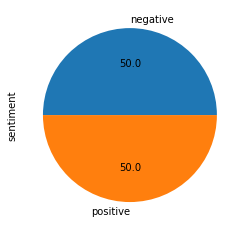

In [ ]:
#equal division of positive and negative sentiment
reviewdata['sentiment'].value_counts().plot(kind='pie',autopct='%.1f')

We can see that the dataset is balanced in the number of negative and positive sentiment reviews. (50% for each type)

DATA CLEANING


In [ ]:
#1. Removing all html tags
import bs4
from bs4 import BeautifulSoup
def html_remover(text):
    soup=BeautifulSoup(text,'html.parser')
    a=soup.get_text()
    return a
reviewdata['review']=reviewdata['review'].apply(html_remover)
reviewdata['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wo

In [ ]:
reviewdata1 = reviewdata[:50000]

In [ ]:
df=reviewdata[:50000]

In [ ]:
reviewdata1

review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. The filming tec...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]

In [ ]:
#2. Preprocesssing data - rconvert to lowercase, remove emoticons and special characters
import re
def preprocessor(text):
  text =re.sub('<[^>]*>', '', text)
  emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
  text = re.sub('[\W]+', ' ', text.lower()) + ' '.join(emoticons).replace('-', '')
  
  return text

preprocessor("This is a :) test :-( !")

'this is a test :) :('

In [ ]:
#Function to remove common words using NLTK and punctuation marks using the string module.
def remove_stpwrds_punct(sms):
    
    remove_punctuation = [i for i in sms if i not in string.punctuation]
    remove_punctuation = "".join(remove_punctuation).split()
    
    remove_stopwords_and_punctuation = \
        [word.lower() for word in remove_punctuation if word.lower() not in stopwords.words("english")]
        
    return remove_stopwords_and_punctuation

#FEATURE ENGINEERING

In [ ]:
#Data Cleaning
#task 3 = tokenisation
from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()

def tokenizer(text):
  return text.split()

def tokenizer_stemmers(text):
  return[porter.stem(word) for word in text]

In [ ]:
# preprocess data
reviewdata1['review'] = reviewdata1['review'].apply(preprocessor)

In [ ]:
reviewdata1['cleaned_data'] = reviewdata1['review'].apply(remove_stpwrds_punct)

In [ ]:
reviewdata1['cleaned_data'] = reviewdata1['cleaned_data'].apply(tokenizer_stemmers)

In [ ]:
smsData_df=reviewdata1
smsData_df


review  ...                                       cleaned_data
0      one of the other reviewers has mentioned that ...  ...  [one, review, mention, watch, 1, oz, episod, h...
1      a wonderful little production the filming tech...  ...  [wonder, littl, product, film, techniqu, unass...
2      i thought this was a wonderful way to spend ti...  ...  [thought, wonder, way, spend, time, hot, summe...
3      basically there s a family where a little boy ...  ...  [basic, famili, littl, boy, jake, think, zombi...
4      petter mattei s love in the time of money is a...  ...  [petter, mattei, love, time, money, visual, st...
...                                                  ...  ...                                                ...
49995  i thought this movie did a down right good job...  ...  [thought, movi, right, good, job, creativ, ori...
49996  bad plot bad dialogue bad acting idiotic direc...  ...  [bad, plot, bad, dialogu, bad, act, idiot, dir...
49997  i am a catholic taught in parochial elementary...  ...  [cathol, taught, parochi, elementari, school, ...
49998  i m going to have to disagree with the previou...  ...  [go, disagre, previou, comment, side, maltin, ...
49999  no one expects the star trek movies to be high...  ...  [one, expect, star, trek, movi, high, art, fan...

[50000 rows x 3 columns]

In [ ]:
smsData_df.columns = ["text", "label", "cleaned_data"]
smsData_train = smsData_df[:35000]
smsData_test = smsData_df[-15000:]

In [ ]:
smsData_train['length'] = smsData_train['text'].apply(len)
smsData_test['length'] = smsData_test['text'].apply(len)
spam_df = smsData_train[smsData_train['label'] == 'negative'] #create sub-dataframe of spam text
good_df = smsData_train[smsData_train['label'] == 'positive'] #sub-dataframe of good text

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
spam_df

text  ... length
3      basically there s a family where a little boy ...  ...    692
7      this show was an amazing fresh innovative idea...  ...    903
8      encouraged by the positive comments about this...  ...    645
10     phil the alien is one of those quirky films wh...  ...    525
11     i saw this movie when i was about 12 when it c...  ...    898
...                                                  ...  ...    ...
34993  he who fights with monsters might take care le...  ...   1798
34995  awful awful awful show real world issues dealt...  ...    820
34996  i like action movies i have a softspot for b f...  ...   2574
34997  it begins on a nice note only to falter quickl...  ...    725
34999  this movie made me laugh so much it was a bloo...  ...    687

[17510 rows x 4 columns]

In [ ]:
good_df

text  ... length
0      one of the other reviewers has mentioned that ...  ...   1679
1      a wonderful little production the filming tech...  ...    941
2      i thought this was a wonderful way to spend ti...  ...    881
4      petter mattei s love in the time of money is a...  ...   1244
5      probably my all time favorite movie a story of...  ...    635
...                                                  ...  ...    ...
34989  this really is a great movie some of the songs...  ...   1137
34990  i know what you re saying oh man pinochio is n...  ...    396
34992  i first watched this movie in istanbul film fe...  ...    422
34994  i m a male not given to women s movies but thi...  ...    361
34998  aardman does it again next to pixar aardman an...  ...    795

[17490 rows x 4 columns]

In [ ]:
smsData_train

text  ... length
0      one of the other reviewers has mentioned that ...  ...   1679
1      a wonderful little production the filming tech...  ...    941
2      i thought this was a wonderful way to spend ti...  ...    881
3      basically there s a family where a little boy ...  ...    692
4      petter mattei s love in the time of money is a...  ...   1244
...                                                  ...  ...    ...
34995  awful awful awful show real world issues dealt...  ...    820
34996  i like action movies i have a softspot for b f...  ...   2574
34997  it begins on a nice note only to falter quickl...  ...    725
34998  aardman does it again next to pixar aardman an...  ...    795
34999  this movie made me laugh so much it was a bloo...  ...    687

[35000 rows x 4 columns]

**SOLUTION*: CLASSIFICATION**

Use the lablelled (positive/negative) sentiments to build a tree based binary classifier, to be able to distinguish positive words from negative ones.

**PREDICTORS:**
1. Lenght of Text.
2. Frequency of occurence of Top 100 'negative' sentiment words. 
3. Frequency of occurence of top 100 'positive sentiment' words.

**Data Visualisation and Exploratory Analysis**

In [ ]:
smsData_train.groupby('label').describe()

length                                                              
            count         mean         std   min    25%    50%     75%      max
label                                                                          
negative  17510.0  1236.402856  898.360938  31.0  679.0  932.0  1497.0   8268.0
positive  17490.0  1271.773642  994.677271  64.0  666.0  926.0  1548.0  13335.0

In [ ]:
smsData_test.groupby('label').describe()

length                                                               
           count         mean         std   min    25%    50%      75%      max
label                                                                          
negative  7490.0  1240.182377  917.138144  49.0  675.0  931.0  1496.75   8472.0
positive  7510.0  1267.080692  975.439966  69.0  667.0  934.0  1545.75  12193.0

**Visualization**

**The subplots used:**

---

1.catplot

2.boxplot

3.Distplot

4.Violinplot

**CATPLOT**

negative    17510
positive    17490
Name: label, dtype: int64


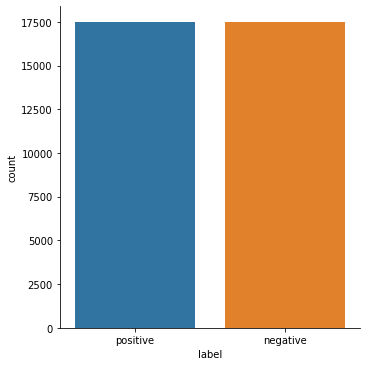

In [ ]:
print(smsData_train["label"].value_counts())
sb.catplot(x = "label", data = smsData_train, kind = "count")

positive    7510
negative    7490
Name: label, dtype: int64


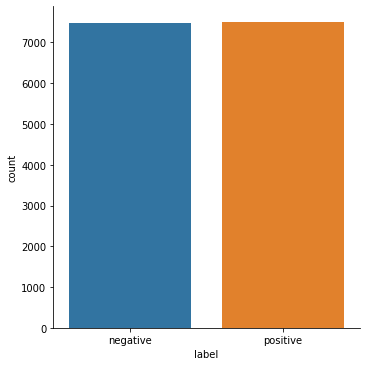

In [ ]:
print(smsData_test["label"].value_counts())
sb.catplot(x = "label", data = smsData_test, kind = "count")

**HISTOGRAM**

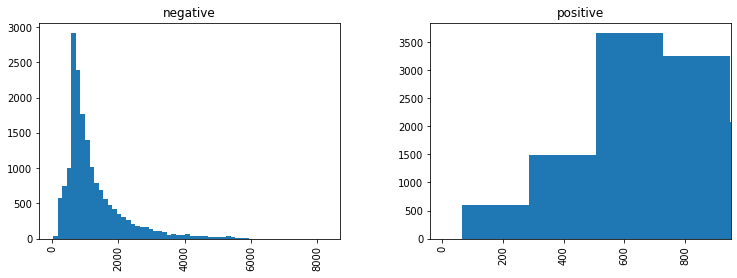

In [ ]:
smsData_train.hist(column='length',by='label',bins=60,figsize=(12,4));
plt.xlim(-40,950);

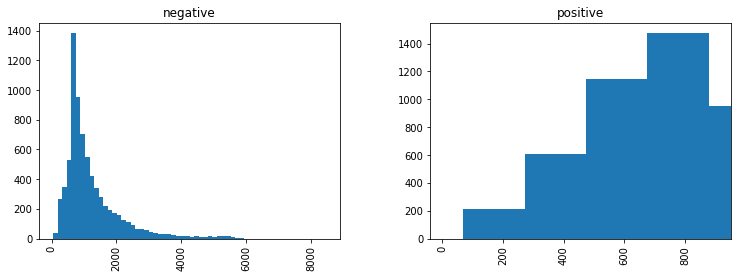

In [ ]:
smsData_test.hist(column='length',by='label',bins=60,figsize=(12,4));
plt.xlim(-40,950);

**PREDICTOR: FREQUENCY**

In [ ]:
smsData1 = smsData_train['cleaned_data'].tolist()
smsData2 = smsData_test['cleaned_data'].tolist()

In [ ]:
good_df.loc[:, 'cleaned_data'] = good_df['cleaned_data']
words_good_df = good_df['cleaned_data'].tolist()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
# get the list of 'good/positive' words
list_good_words = []
for sublist in words_good_df:
    for item in sublist:
        list_good_words.append(item)

In [ ]:
#extract the top 100 common 'good' words
c_good  = Counter(list_good_words)
good_words_df  = pd.DataFrame(c_good.most_common(100),  columns=['word', 'count'])

In [ ]:
good_words_df

word  count
0      film  35665
1      movi  31416
2       one  19872
3      like  14342
4      time  11625
..      ...    ...
95      bad   2633
96     girl   2627
97   believ   2608
98     turn   2605
99  thought   2592

[100 rows x 2 columns]

In [ ]:
spam_df.loc[0:, 'cleaned_data'] = spam_df['cleaned_data']
words_spam_df = spam_df['cleaned_data'].tolist()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
#get the list of 'spam' words
list_spam_words = []
for sublist in words_spam_df:
    for item in sublist:
        list_spam_words.append(item)

# extract top 100 common 'spam' words
c_spam  = Counter(list_spam_words)
spam_words_df  = pd.DataFrame(c_spam.most_common(100),  columns=['word', 'count'])

In [ ]:
spam_words_df

word  count
0      movi  40888
1      film  31346
2       one  18902
3      like  17273
4      make  11430
..      ...    ...
95   effect   2718
96     fact   2714
97    least   2709
98  thought   2707
99   enough   2706

[100 rows x 2 columns]

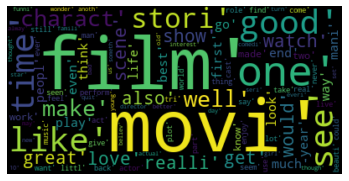

In [ ]:
text = good_words_df['word'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()




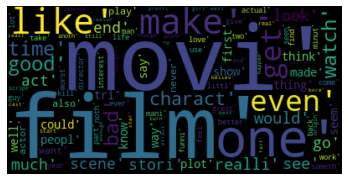

In [ ]:
text = spam_words_df['word'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

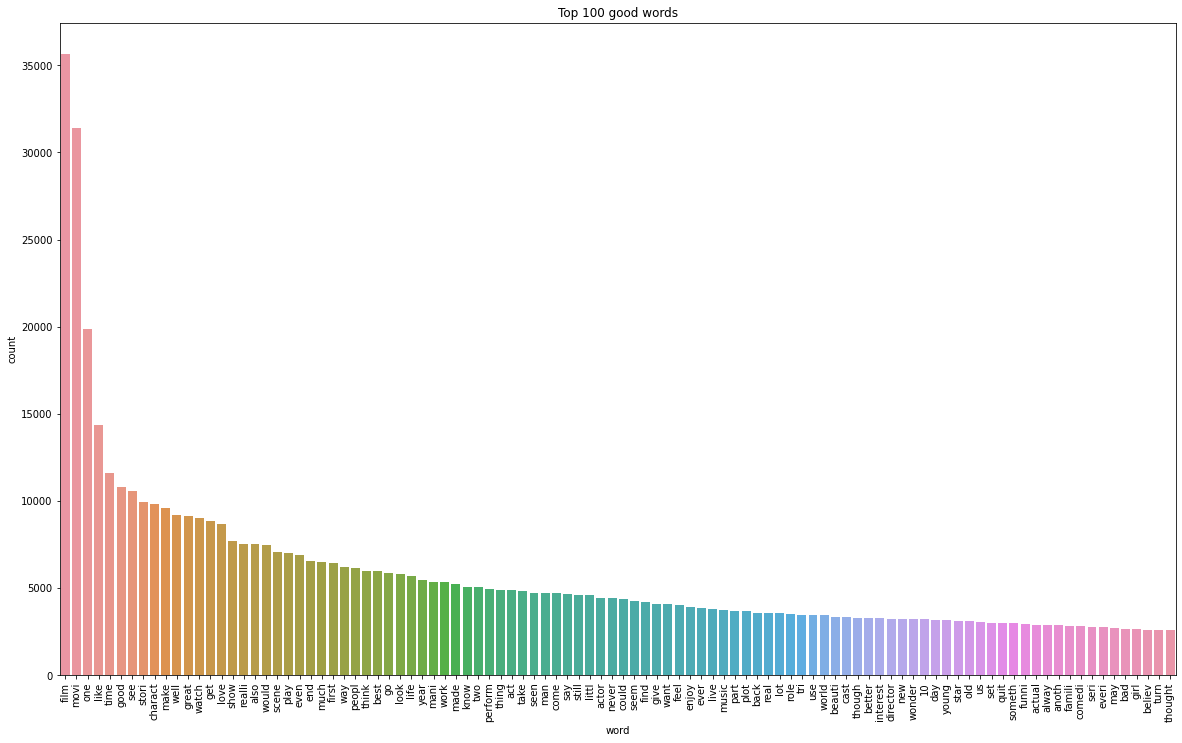

In [ ]:
# barplot for the top 100 common 'good' words.
fig, ax = plt.subplots(figsize=(20, 12))
sb.barplot(x='word', y='count', 
            data=good_words_df, ax=ax)
plt.title("Top 100 good words")
plt.xticks(rotation='vertical');

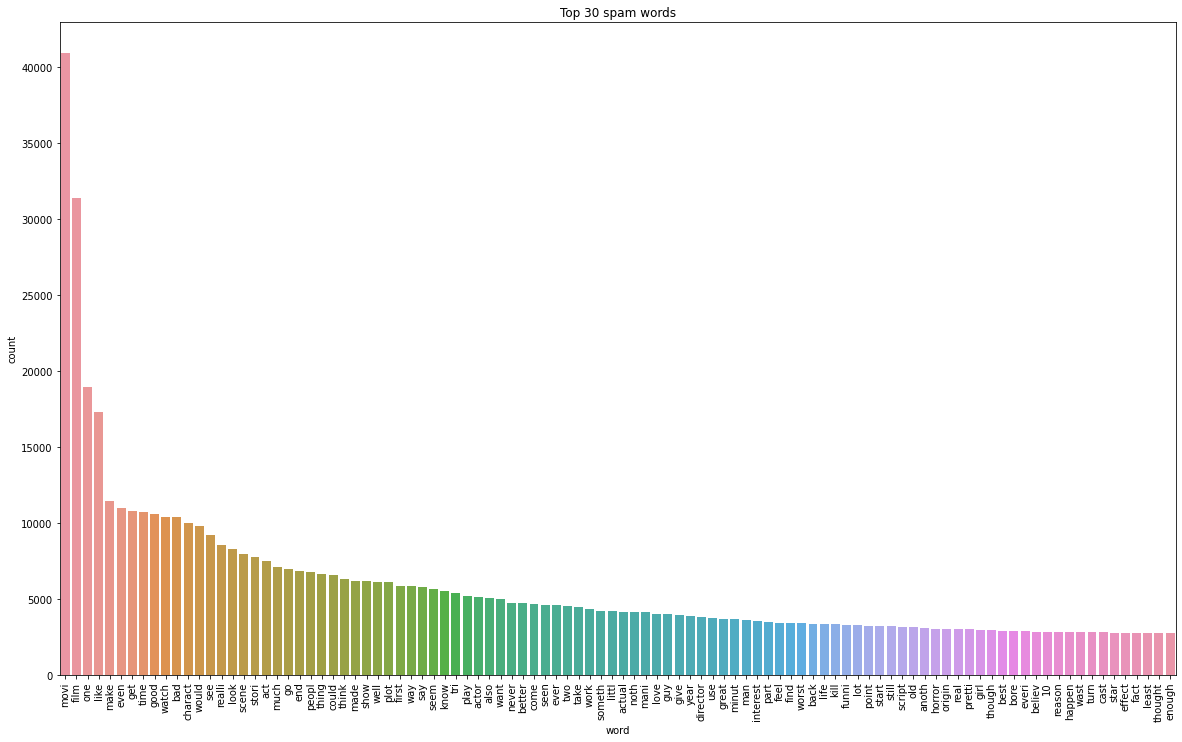

In [ ]:
# barplot for the top 30 common spam words
fig, ax = plt.subplots(figsize=(20, 12))
sb.barplot(x='word', y='count', 
            data=spam_words_df, ax=ax)
plt.title("Top 30 spam words")
plt.xticks(rotation='vertical');

In [ ]:
# get the frequency of 'spam/negative' words in train dataset.
list_spam1 = []
i = 0
while i < 35000:
    sum =0
    j=0
    while j <= 99:
        k=0
        while k < len(smsData1[i]):
            if smsData1[i][k] == spam_words_df['word'][j]:
                sum = sum + 1
            k = k+1
        j = j+1
    i = i+1
    list_spam1.append(sum)

In [ ]:
# get the frequency of 'spam/negative' words in test dataset.
list_spam2 = []
i = 0
while i < 15000:
    sum =0
    j=0
    while j <= 99:
        k=0
        while k < len(smsData2[i]):
            if smsData2[i][k] == spam_words_df['word'][j]:
                sum = sum + 1
            k = k+1
        j = j+1
    i = i+1
    list_spam2.append(sum)

In [ ]:
# get the frequency of 'good/positive' words in train dataset.
list_good1 = []
i = 0
while i < 35000:
    sum =0
    j=0
    while j <= 99:
        k=0
        while k < len(smsData1[i]):
            if smsData1[i][k] == good_words_df['word'][j]:
                sum = sum + 1
            k = k+1
        j = j+1
    i = i+1
    list_good1.append(sum)

In [ ]:
# get the frequency of 'good/positive' words in test dataset.
list_good2 = []
i = 0
while i < 15000:
    sum =0
    j=0
    while j <= 99:
        k=0
        while k < len(smsData2[i]):
            if smsData2[i][k] == good_words_df['word'][j]:
                sum = sum + 1
            k = k+1
        j = j+1
    i = i+1
    list_good2.append(sum)

In [ ]:
# add the the frequency of 'good' words and 'spam' words occuring in the text as column
# in the train and test dataset.
smsData_train['freq_spam'] = list_spam1
smsData_train['freq_good'] = list_good1
smsData_test['freq_spam'] = list_spam2
smsData_test['freq_good'] = list_good2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
freq_spam1 = pd.DataFrame(smsData_train['freq_spam'])  
freq_good1 = pd.DataFrame(smsData_train['freq_good'])
length1 = pd.DataFrame(smsData_train['length']) 
label1 = pd.DataFrame(smsData_train['label'])
freq_spam2 = pd.DataFrame(smsData_test['freq_spam'])  
freq_good2 = pd.DataFrame(smsData_test['freq_good'])
length2 = pd.DataFrame(smsData_test['length']) 
label2 = pd.DataFrame(smsData_test['label'])

# split the predictors into train and test dataset.
freq_spam_train = pd.DataFrame(freq_spam1)
freq_good_train = pd.DataFrame(freq_good1)
length_train = pd.DataFrame(length1)
label_train = pd.DataFrame(label1)
freq_spam_test = pd.DataFrame(freq_spam2)
freq_good_test = pd.DataFrame(freq_good2)
length_test = pd.DataFrame(length2)
label_test = pd.DataFrame(label2)

**COUNTPLOT**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


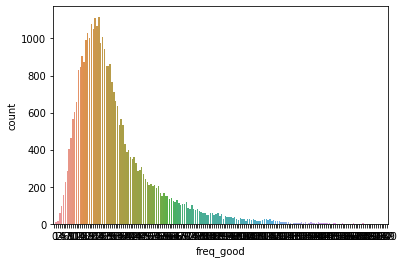

In [ ]:
sb.countplot(freq_good_train["freq_good"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


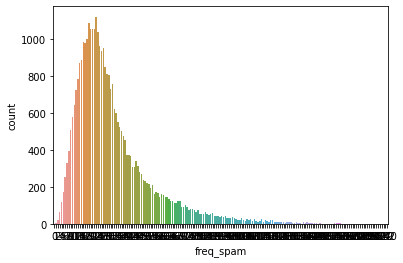

In [ ]:
sb.countplot(freq_spam_train["freq_spam"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


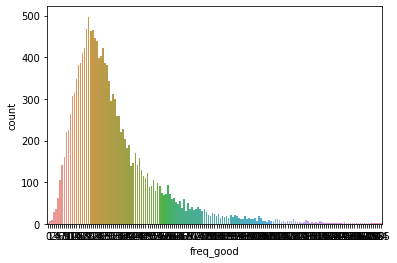

In [ ]:
sb.countplot(freq_good_test["freq_good"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


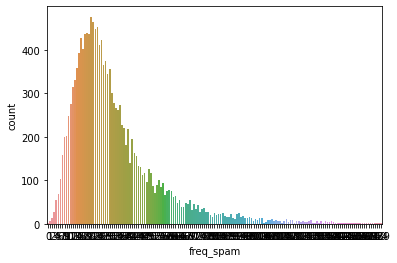

In [ ]:
sb.countplot(freq_spam_test["freq_spam"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


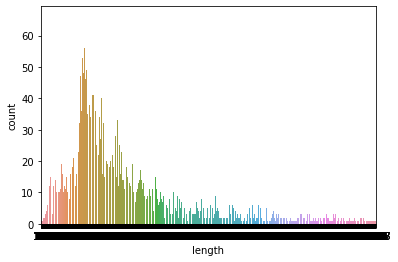

In [ ]:
sb.countplot(length_train["length"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


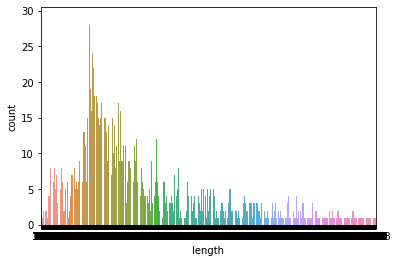

In [ ]:
sb.countplot(length_test["length"])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


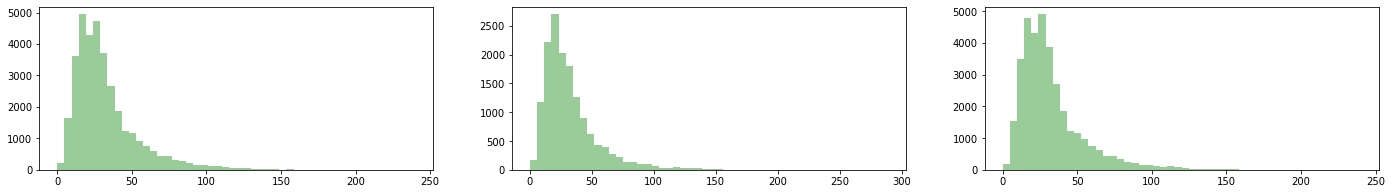

In [ ]:
# subplots for predictor freq_spam_train
f, axes = plt.subplots(1, 3, figsize=(24, 3))
sb.distplot(freq_spam_train, kde = False, ax = axes[0], color = "g")
sb.distplot(freq_spam_test, kde = False, ax = axes[1], color = "g")
sb.distplot(freq_good_train, kde = False, ax = axes[2], color = "g")


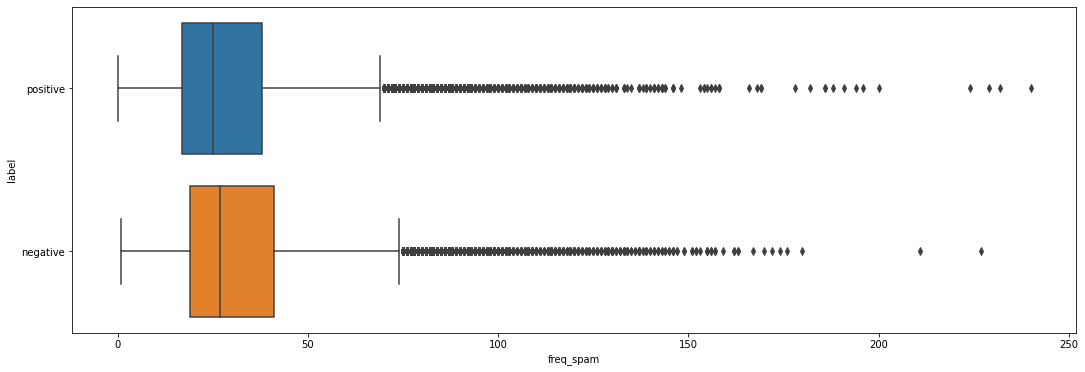

In [ ]:
jointDF = pd.concat([freq_spam_train, label_train.reindex(index=freq_spam_train.index)], sort = False, axis = 1)

# Joint Boxplot of freq_spam Train against label Train
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.boxplot(x = "freq_spam", y = "label", data = jointDF, orient = "h")

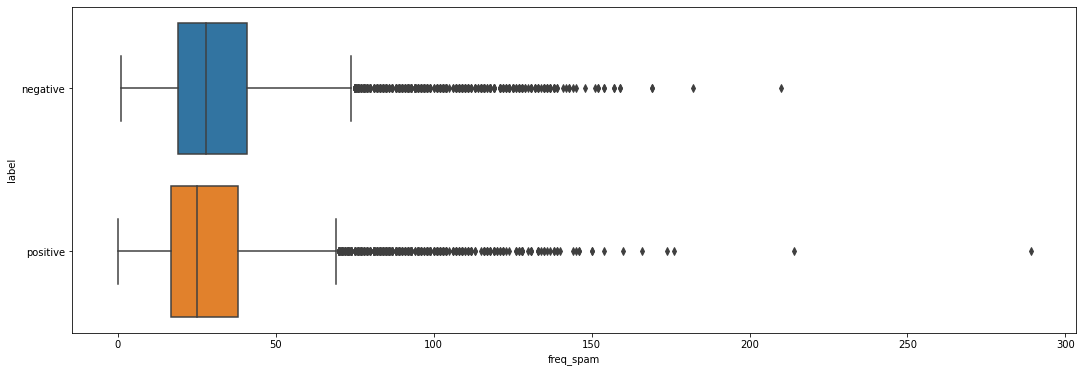

In [ ]:
jointDF = pd.concat([freq_spam_test, label_test.reindex(index=freq_spam_test.index)], sort = False, axis = 1)

# Joint Boxplot of freq_soam Test against label test
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.boxplot(x = "freq_spam", y = "label", data = jointDF, orient = "h")

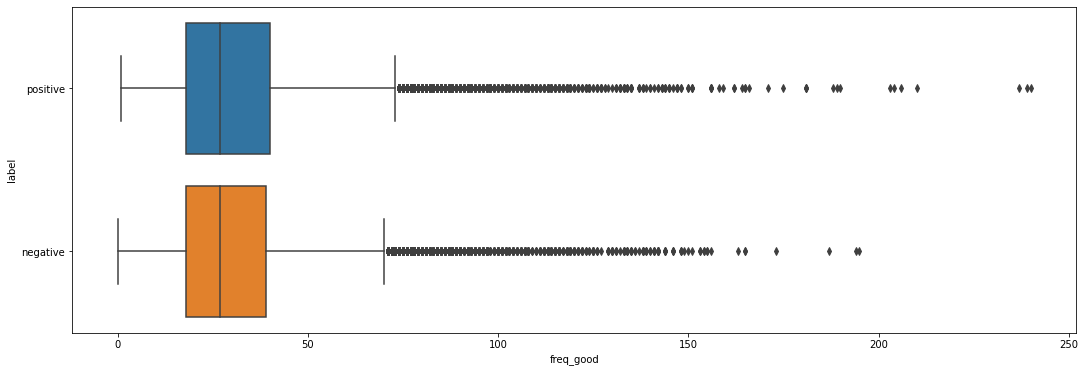

In [ ]:
jointDF = pd.concat([freq_good_train, label_train.reindex(index=freq_spam_train.index)], sort = False, axis = 1)

# Joint Boxplot of freq_good Train against label Train
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.boxplot(x = "freq_good", y = "label", data = jointDF, orient = "h")

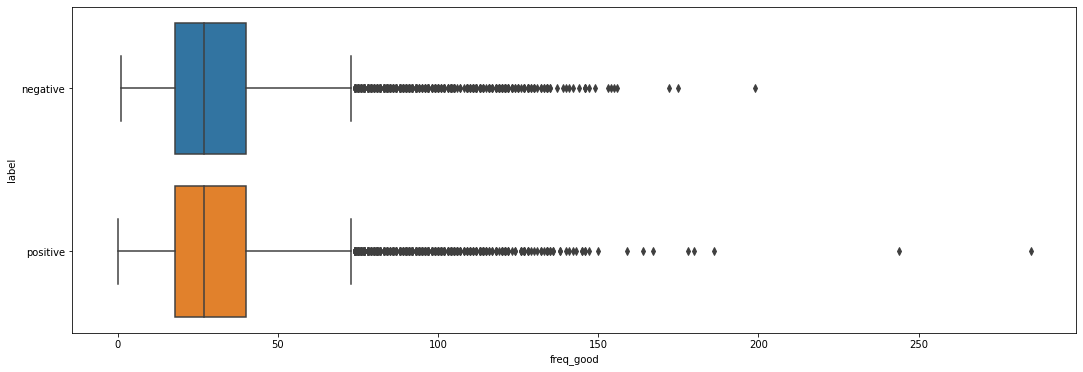

In [ ]:
jointDF = pd.concat([freq_good_test, label_test.reindex(index=freq_spam_test.index)], sort = False, axis = 1)

# Joint Boxplot of freq_good Test against label Test
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.boxplot(x = "freq_good", y = "label", data = jointDF, orient = "h")

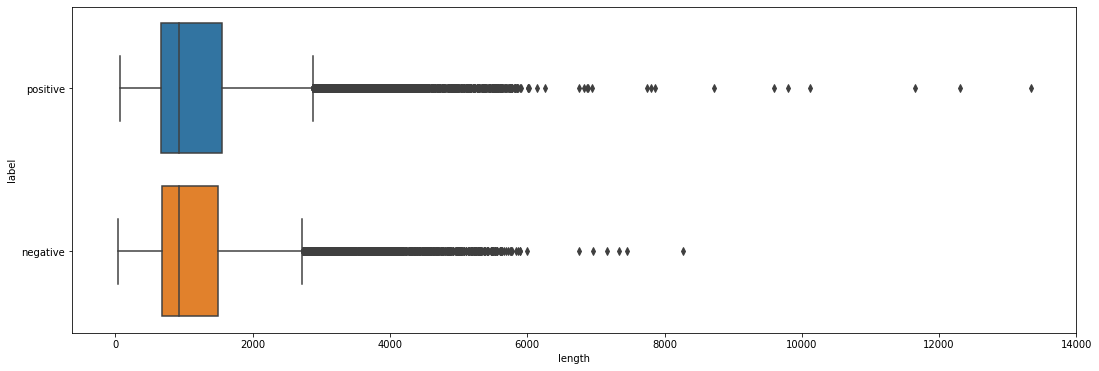

In [ ]:
jointDF = pd.concat([length_train, label_train.reindex(index=length_train.index)], sort = False, axis = 1)

# Joint Boxplot of length Train against label Train
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.boxplot(x = "length", y = "label", data = jointDF, orient = "h")

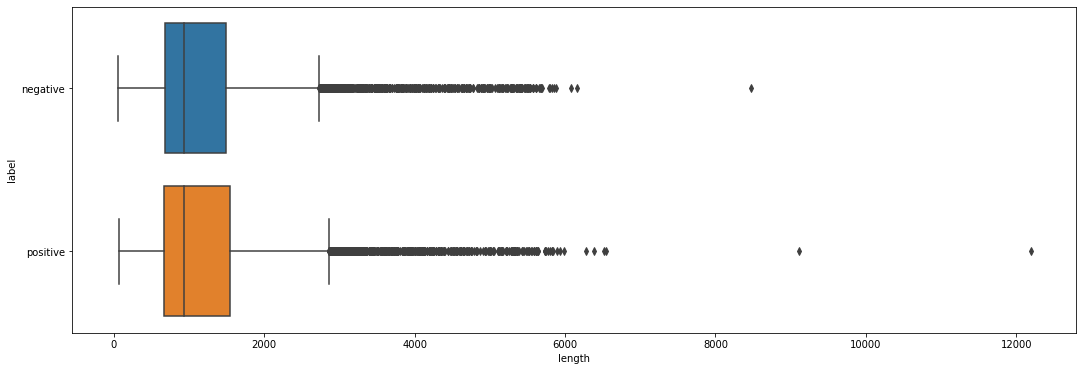

In [ ]:
jointDF = pd.concat([length_test, label_test.reindex(index=length_test.index)], sort = False, axis = 1)

# Joint Boxplot of length Test against label Test
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.boxplot(x = "length", y = "label", data = jointDF, orient = "h")

In [ ]:
smsData_train.head()

text  ... freq_good
0  one of the other reviewers has mentioned that ...  ...        26
1  a wonderful little production the filming tech...  ...        26
2  i thought this was a wonderful way to spend ti...  ...        28
3  basically there s a family where a little boy ...  ...        20
4  petter mattei s love in the time of money is a...  ...        44

[5 rows x 6 columns]

In [ ]:
smsData_test.head()

text  ... freq_good
35000  just don t bother i thought i would see a movi...  ...        22
35001  be careful with this one once you get yer mitt...  ...        44
35002  chili palmer is tired of doing movies and know...  ...        39
35003  following is a little known 1998 british film ...  ...       104
35004  dark angel is a cross between huxley s brave n...  ...        10

[5 rows x 6 columns]

In [ ]:
#split the data into test and train
y_train = pd.DataFrame(smsData_train["label"])
X_train = pd.DataFrame(smsData_train[["length", "freq_spam", "freq_good"]])
y_test = pd.DataFrame(smsData_test["label"])
X_test = pd.DataFrame(smsData_test[["length", "freq_spam", "freq_good"]])

In [ ]:
# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (35000, 1) (35000, 3)
Test Set  : (15000, 1) (15000, 3)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


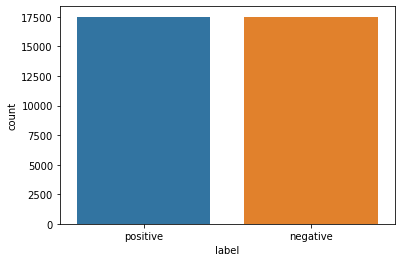

In [ ]:
sb.countplot(y_train["label"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


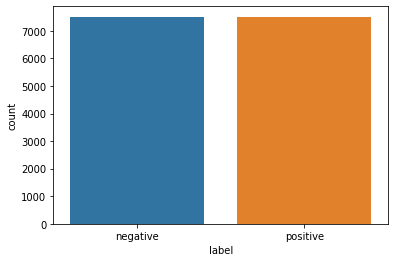

In [ ]:
sb.countplot(y_test["label"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/li

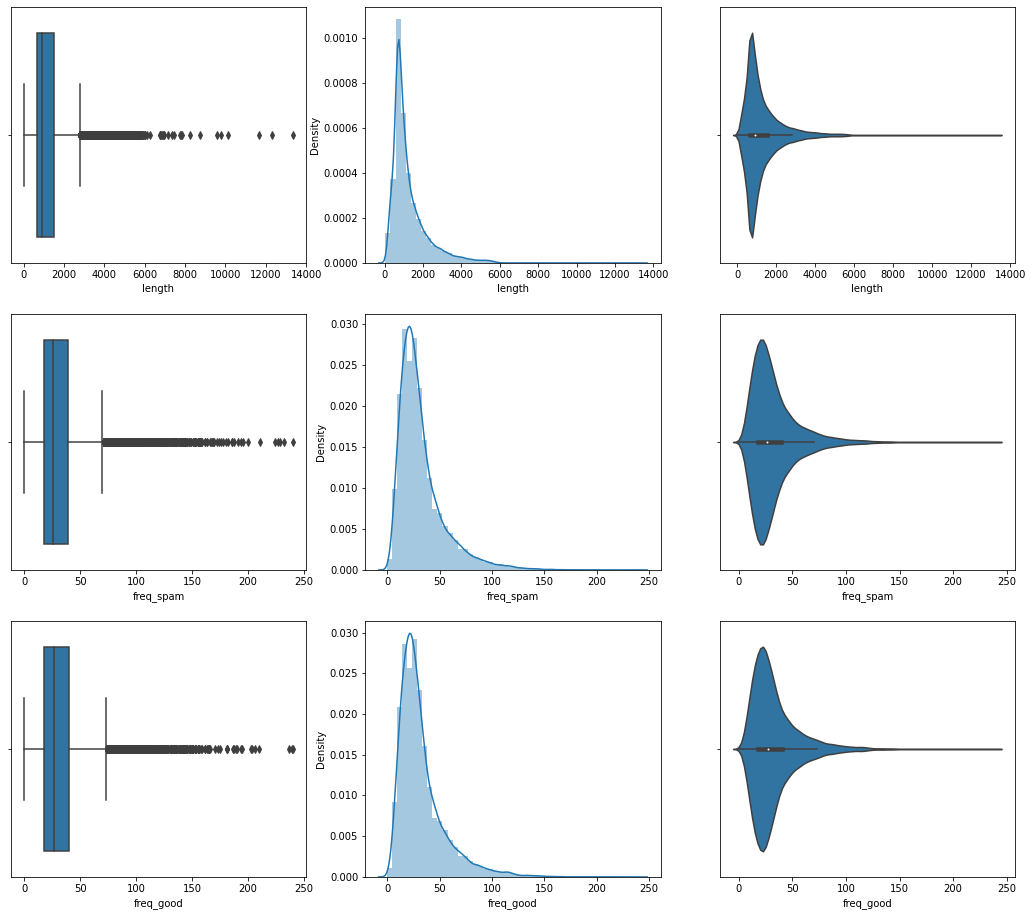

In [ ]:
# Draw the distributions of all Predictors train data
f, axes = plt.subplots(3, 3, figsize=(18, 16))

count = 0
for var in X_train:
    sb.boxplot(X_train[var], orient = "h", ax = axes[count,0])
    sb.distplot(X_train[var], ax = axes[count,1])
    sb.violinplot(X_train[var], ax = axes[count,2])
    count += 1

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/li

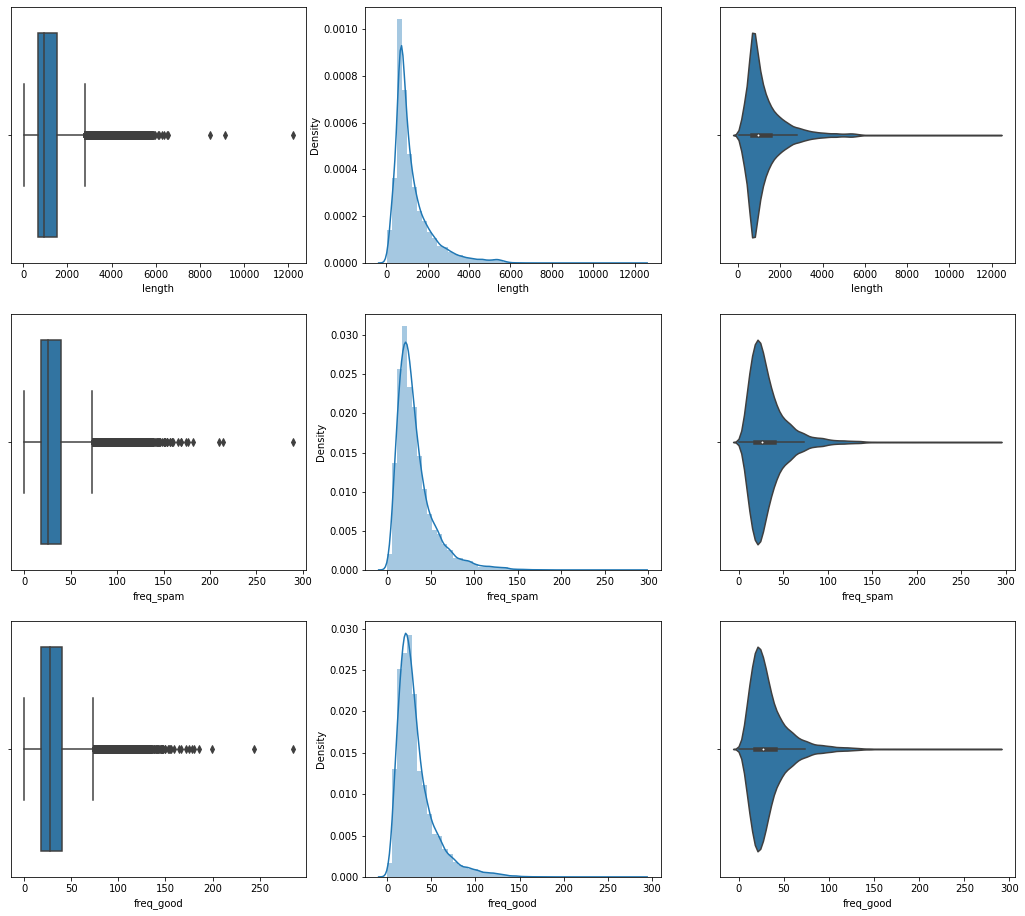

In [ ]:
# Draw the distributions of all Predictors test data 
f, axes = plt.subplots(3, 3, figsize=(18, 16))

count = 0
for var in X_train:
    sb.boxplot(X_test[var], orient = "h", ax = axes[count,0])
    sb.distplot(X_test[var], ax = axes[count,1])
    sb.violinplot(X_test[var], ax = axes[count,2])
    count += 1

**SINGLE VARIABLE DECISION TREE**

This is drawn to get the confusion matrix and hence the accuracy of the classification using each individual feature that we have engineered. 

we can then find out which feature is the better predictor 

decision tree chosen with max depth = 10

In [ ]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 10)

# Train the Decision Tree Classifier model
dectree.fit(freq_spam_train, label_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

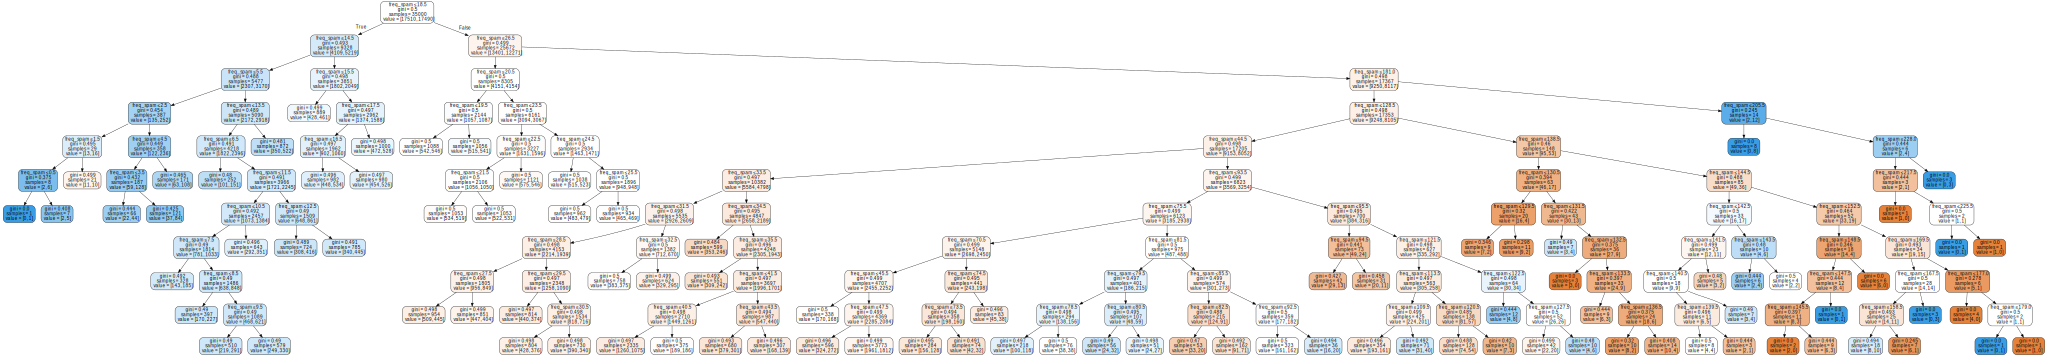

In [ ]:
# Import export_graphviz from sklearn.tree
from sklearn.tree import export_graphviz

# Export the Decision Tree as a dot object
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = freq_spam_train.columns,      # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

# Render using graphviz
import graphviz
graphviz.Source(treedot)

Classification Accuracy 	: 0.5355428571428571
True Positive Rate:   0.47289879931389367
True Negative Rate:   0.5981153626499144
False Positive Rate:  0.40188463735008567
False Negative Rate:  0.5271012006861063


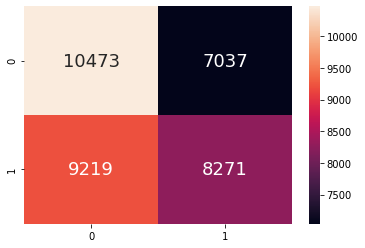

In [ ]:
# Predict sentiment corresponding to freq_spam_train
label_train_pred = dectree.predict(freq_spam_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(freq_spam_train, label_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(label_train, label_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

[[tn, fp], [fn, tp]] = confusion_matrix(y_train, label_train_pred)
print("True Positive Rate:  ", tp/(tp+fn))
print("True Negative Rate:  ", tn/(tn+fp))
print("False Positive Rate: ", fp/(tn+fp))
print("False Negative Rate: ", fn/(tp+fn))

Classification Accuracy 	: 0.5302666666666667
True Positive Rate:   0.4675099866844208
True Negative Rate:   0.5931909212283044
False Positive Rate:  0.4068090787716956
False Negative Rate:  0.5324900133155792


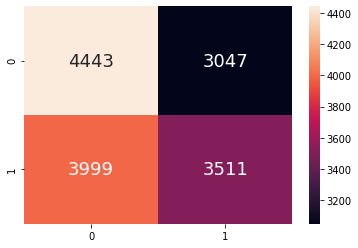

In [ ]:
# Predict sentiment corresponding to freq_spam_test
label_test_pred = dectree.predict(freq_spam_test)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(freq_spam_test, label_test))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(label_test, label_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

[[tn, fp], [fn, tp]] = confusion_matrix(y_test, label_test_pred)
print("True Positive Rate:  ", tp/(tp+fn))
print("True Negative Rate:  ", tn/(tn+fp))
print("False Positive Rate: ", fp/(tn+fp))
print("False Negative Rate: ", fn/(tp+fn))

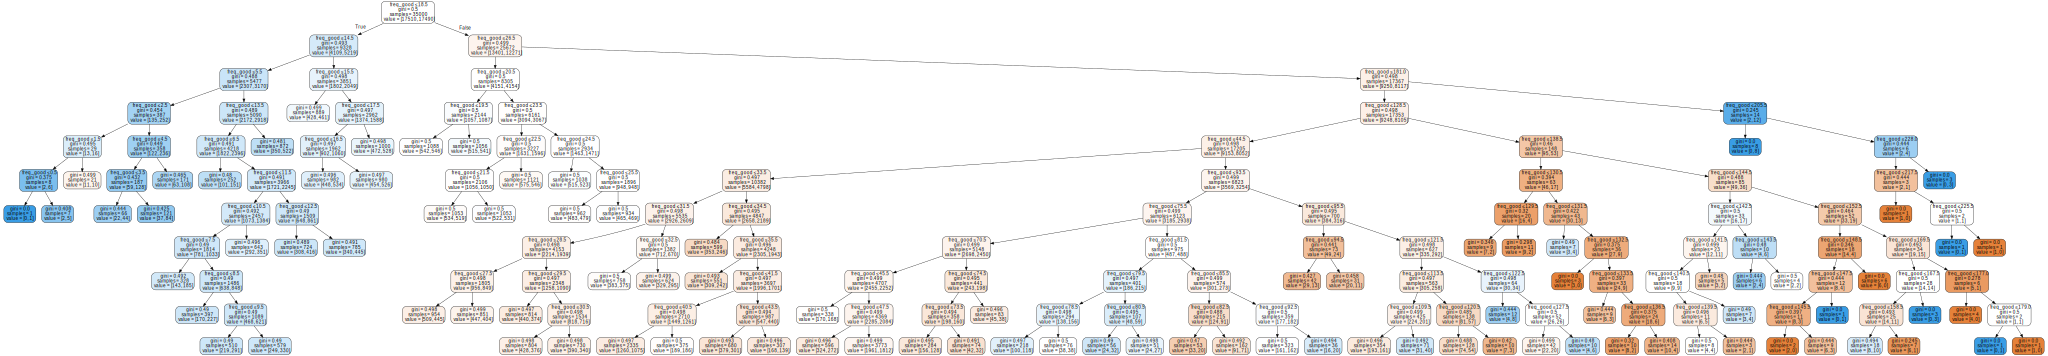

In [ ]:
# Import export_graphviz from sklearn.tree
from sklearn.tree import export_graphviz

# Export the Decision Tree as a dot object
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = freq_good_train.columns,      # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

# Render using graphviz
import graphviz
graphviz.Source(treedot)

Classification Accuracy 	: 0.5022285714285715
True Positive Rate:   0.43522012578616354
True Negative Rate:   0.5691604797258709
False Positive Rate:  0.4308395202741291
False Negative Rate:  0.5647798742138365


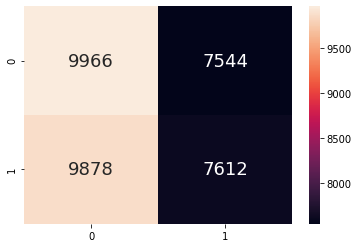

In [ ]:
# Predict Sentiment corresponding to freq_good_train
label_train_pred = dectree.predict(freq_good_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(freq_good_train, label_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(label_train, label_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

[[tn, fp], [fn, tp]] = confusion_matrix(y_train, label_train_pred)
print("True Positive Rate:  ", tp/(tp+fn))
print("True Negative Rate:  ", tn/(tn+fp))
print("False Positive Rate: ", fp/(tn+fp))
print("False Negative Rate: ", fn/(tp+fn))

Classification Accuracy 	: 0.5032666666666666
True Positive Rate:   0.4330226364846871
True Negative Rate:   0.57369826435247
False Positive Rate:  0.42630173564753004
False Negative Rate:  0.5669773635153129


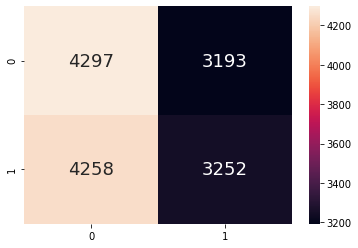

In [ ]:
# Predict Sentiment corresponding to freq_spam_test
label_test_pred = dectree.predict(freq_good_test)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(freq_good_test, label_test))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(label_test, label_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

[[tn, fp], [fn, tp]] = confusion_matrix(y_test, label_test_pred)
print("True Positive Rate:  ", tp/(tp+fn))
print("True Negative Rate:  ", tn/(tn+fp))
print("False Positive Rate: ", fp/(tn+fp))
print("False Negative Rate: ", fn/(tp+fn))

In [ ]:
#USING LENGTH PREDICTOR

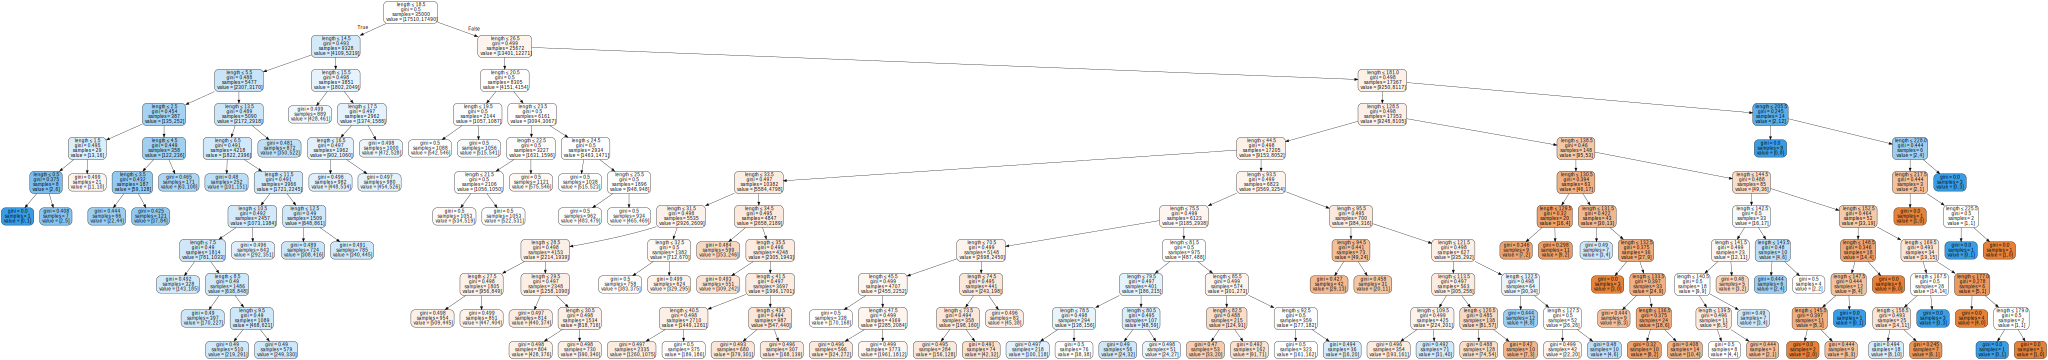

In [ ]:
# Import export_graphviz from sklearn.tree
from sklearn.tree import export_graphviz

# Export the Decision Tree as a dot object
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = length_train.columns,      # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

# Render using graphviz
import graphviz
graphviz.Source(treedot)

Classification Accuracy 	: 0.49917142857142854
True Positive Rate:   0.9938250428816466
True Negative Rate:   0.00508280982295831
False Positive Rate:  0.9949171901770417
False Negative Rate:  0.0061749571183533445


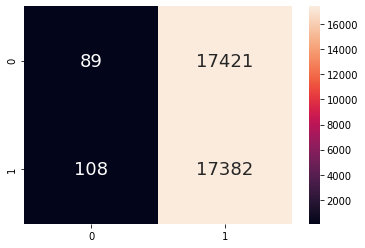

In [ ]:
# Predict Legendary corresponding to length_train
label_train_pred = dectree.predict(length_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(length_train, label_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(label_train, label_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

[[tn, fp], [fn, tp]] = confusion_matrix(y_train, label_train_pred)
print("True Positive Rate:  ", tp/(tp+fn))
print("True Negative Rate:  ", tn/(tn+fp))
print("False Positive Rate: ", fp/(tn+fp))
print("False Negative Rate: ", fn/(tp+fn))

Classification Accuracy 	: 0.5
True Positive Rate:   0.9932090545938749
True Negative Rate:   0.005473965287049399
False Positive Rate:  0.9945260347129506
False Negative Rate:  0.006790945406125166


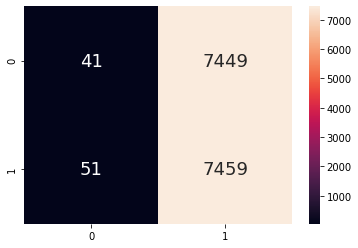

In [ ]:
# Predict Legendary corresponding to length_test
label_test_pred = dectree.predict(length_test)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(length_test, label_test))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(label_test, label_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

[[tn, fp], [fn, tp]] = confusion_matrix(y_test, label_test_pred)
print("True Positive Rate:  ", tp/(tp+fn))
print("True Negative Rate:  ", tn/(tn+fp))
print("False Positive Rate: ", fp/(tn+fp))
print("False Negative Rate: ", fn/(tp+fn))

**MULTI VARIATE CLASSIFICATION TREE**

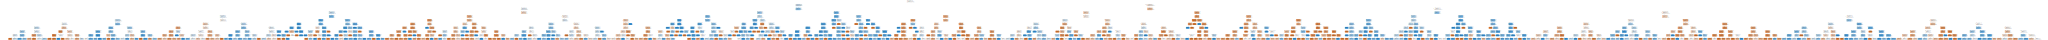

In [ ]:
# Import DecisionTreeClassifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 10)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the Decision Tree
from sklearn.tree import export_graphviz
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

import graphviz
graphviz.Source(treedot)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6542571428571429

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6298

True Positive Rate:   0.7652944539736992
True Negative Rate:   0.5433466590519703
False Positive Rate:  0.4566533409480297
False Negative Rate:  0.23470554602630075

True Positive Rate:   0.7418109187749667
True Negative Rate:   0.5174899866488651
False Positive Rate:  0.48251001335113486
False Negative Rate:  0.2581890812250333

precision:  0.7418109187749667
recall:  0.6065323897659227

the f1_score for the classification model:  0.6673854447439352


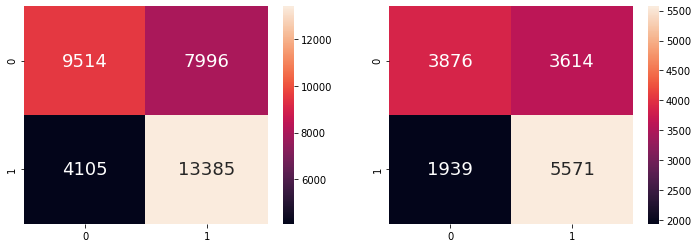

In [ ]:
# Predict Legendary values corresponding to predictors (length, freq_spam, freq_good)
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
[[tn, fp], [fn, tp]] = confusion_matrix(y_train, y_train_pred)
print("True Positive Rate:  ", tp/(tp+fn))
print("True Negative Rate:  ", tn/(tn+fp))
print("False Positive Rate: ", fp/(tn+fp))
print("False Negative Rate: ", fn/(tp+fn))
print("")

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
[[tn, fp], [fn, tp]] = confusion_matrix(y_test, y_test_pred)
print("True Positive Rate:  ", tp/(tp+fn))
print("True Negative Rate:  ", tn/(tn+fp))
print("False Positive Rate: ", fp/(tn+fp))
print("False Negative Rate: ", fn/(tp+fn))
print("")

precision = tp/(tp+fn)
recall = tp/(tp+fp)

print("precision: ",precision)
print("recall: ",recall)
print("")

f1_score = (2*precision*recall)/(precision+recall)

print("the f1_score for the classification model: ",f1_score)

**RANDOM FOREST**

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8091714285714285

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6700666666666667

Train Dataset
True Positive Rate:   0.7961120640365923
True Negative Rate:   0.8222158766419189
False Positive Rate:  0.1777841233580811
False Negative Rate:  0.20388793596340765

Test Dataset
True Positive Rate:   0.6613848202396804
True Negative Rate:   0.6787716955941255
False Positive Rate:  0.3212283044058745
False Negative Rate:  0.3386151797603196

precision:  0.6613848202396804
recall:  0.6736742167367422

the f1_score for the classification model:  0.6674729557212927


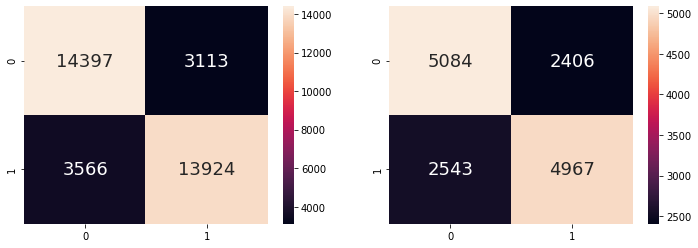

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                 max_depth = 15)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.values.ravel())

from sklearn.metrics import confusion_matrix

# Predict Legendary values corresponding to predictors (length, freq_spam, freq_good)
y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
[[tn1, fp1], [fn1, tp1]] = confusion_matrix(y_train, y_train_pred)
print("Train Dataset")
print("True Positive Rate:  ", tp1/(tp1+fn1))
print("True Negative Rate:  ", tn1/(tn1+fp1))
print("False Positive Rate: ", fp1/(tn1+fp1))
print("False Negative Rate: ", fn1/(tp1+fn1))
print("")
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
[[tn2, fp2], [fn2, tp2]] = confusion_matrix(y_test, y_test_pred)
print("Test Dataset")
print("True Positive Rate:  ", tp2/(tp2+fn2))
print("True Negative Rate:  ", tn2/(tn2+fp2))
print("False Positive Rate: ", fp2/(tn2+fp2))
print("False Negative Rate: ", fn2/(tp2+fn2))
print("")

precision = tp2/(tp2+fn2)
recall = tp2/(tp2+fp2)

print("precision: ",precision)
print("recall: ",recall)
print("")

f1_score = (2*precision*recall)/(precision+recall)

print("the f1_score for the classification model: ",f1_score)

# WORD EMBEDDING: BAG OF WORDS

Reference: https://towardsdatascience.com/multi-label-classification-using-bag-of-words-bow-and-tf-idf-4f95858740e5

In [ ]:
#preprocess data
df['review']=df['review'].apply(preprocessor)

In [ ]:
df

review sentiment
0      one of the other reviewers has mentioned that ...  positive
1      a wonderful little production the filming tech...  positive
2      i thought this was a wonderful way to spend ti...  positive
3      basically there s a family where a little boy ...  negative
4      petter mattei s love in the time of money is a...  positive
...                                                  ...       ...
49995  i thought this movie did a down right good job...  positive
49996  bad plot bad dialogue bad acting idiotic direc...  negative
49997  i am a catholic taught in parochial elementary...  negative
49998  i m going to have to disagree with the previou...  negative
49999  no one expects the star trek movies to be high...  negative

[50000 rows x 2 columns]

In [ ]:
#Separation into training and testing
from sklearn.model_selection import train_test_split
df_train, df_test, train_data_label, test_data_label = train_test_split(df['review'], df['sentiment'], test_size=0.30, random_state=42)

In [ ]:
# label positive sentmient as '1' and negative sentiment as '0'
train_data_label=(train_data_label.replace({'positive':1,'negative':0}))
test_data_label=(test_data_label.replace({'positive':1,'negative':0}))

In [ ]:
#Creating cleaned corpus from the cleaned df['review'] dataset for the purpose of training
corpus_train = []
corpus_test  = []

for i in df_train.index:
    temp=df_train[i]
    corpus_train.append(temp)

for j in df_test.index:
    temp1=df_test[j]
    corpus_test.append(temp1)

In [ ]:
#Dummy corpus to perform Vectorization
corpus_train2=corpus_train
corpus_test2=corpus_test

#5. Count Vectorization (Bag of words model)
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
cv_train=cv.fit_transform(corpus_train2)
cv_test=cv.transform(corpus_test2)

In [ ]:
#6. Using a Support vector classifier for training our model
from sklearn.svm import LinearSVC
lin_svc=LinearSVC(C=0.5,random_state=42,max_iter=10000)
lin_svc.fit(cv_train,train_data_label)

y_pred=lin_svc.predict(cv_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


print(classification_report(test_data_label,y_pred))
print("ACCURACY SCORE IS: " , accuracy_score(test_data_label,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      7411
           1       0.87      0.88      0.87      7589

    accuracy                           0.87     15000
   macro avg       0.87      0.87      0.87     15000
weighted avg       0.87      0.87      0.87     15000

ACCURACY SCORE IS:  0.8715333333333334


USING RANDOM FOREST ON BAG OF WORDS 

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8962285714285714

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8430666666666666

Train Dataset
True Positive Rate:   0.9218884613175579
True Negative Rate:   0.8708283586332367
False Positive Rate:  0.12917164136676332
False Negative Rate:  0.07811153868244214

Test Dataset
True Positive Rate:   0.8612465410462512
True Negative Rate:   0.8244501416812846
False Positive Rate:  0.17554985831871542
False Negative Rate:  0.13875345895374885

precision:  0.8612465410462512
recall:  0.8339925992088809

the f1_score for the classification model:  0.847400492674705


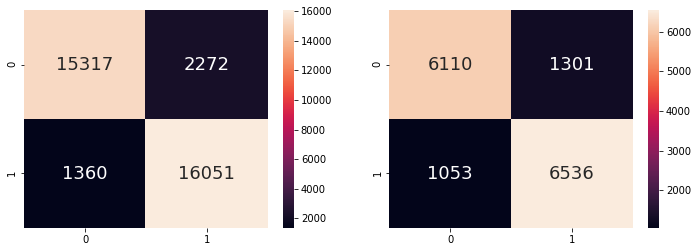

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                 max_depth = 15)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(cv_train, train_data_label.values.ravel())

from sklearn.metrics import confusion_matrix

# Predict Legendary values corresponding to predictors (length, freq_spam, freq_good)
y_train_pred = rforest.predict(cv_train)
y_test_pred = rforest.predict(cv_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(cv_train, train_data_label))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(cv_test, test_data_label))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(train_data_label, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
[[tn1, fp1], [fn1, tp1]] = confusion_matrix(train_data_label, y_train_pred)
print("Train Dataset")
print("True Positive Rate:  ", tp1/(tp1+fn1))
print("True Negative Rate:  ", tn1/(tn1+fp1))
print("False Positive Rate: ", fp1/(tn1+fp1))
print("False Negative Rate: ", fn1/(tp1+fn1))
print("")
sb.heatmap(confusion_matrix(test_data_label, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
[[tn2, fp2], [fn2, tp2]] = confusion_matrix(test_data_label, y_test_pred)
print("Test Dataset")
print("True Positive Rate:  ", tp2/(tp2+fn2))
print("True Negative Rate:  ", tn2/(tn2+fp2))
print("False Positive Rate: ", fp2/(tn2+fp2))
print("False Negative Rate: ", fn2/(tp2+fn2))
print("")

precision = tp2/(tp2+fn2)
recall = tp2/(tp2+fp2)

print("precision: ",precision)
print("recall: ",recall)
print("")

f1_score = (2*precision*recall)/(precision+recall)

print("the f1_score for the classification model: ",f1_score)

# **TF-IDF VECORISATION**

In [ ]:
reviewdata1 = reviewdata1.rename(columns={"text": "review", "label": "sentiment"})

In [ ]:
reviewdata1

review  ...                                       cleaned_data
0      one of the other reviewers has mentioned that ...  ...  [one, review, mention, watch, 1, oz, episod, h...
1      a wonderful little production the filming tech...  ...  [wonder, littl, product, film, techniqu, unass...
2      i thought this was a wonderful way to spend ti...  ...  [thought, wonder, way, spend, time, hot, summe...
3      basically there s a family where a little boy ...  ...  [basic, famili, littl, boy, jake, think, zombi...
4      petter mattei s love in the time of money is a...  ...  [petter, mattei, love, time, money, visual, st...
...                                                  ...  ...                                                ...
49995  i thought this movie did a down right good job...  ...  [thought, movi, right, good, job, creativ, ori...
49996  bad plot bad dialogue bad acting idiotic direc...  ...  [bad, plot, bad, dialogu, bad, act, idiot, dir...
49997  i am a catholic taught in parochial elementary...  ...  [cathol, taught, parochi, elementari, school, ...
49998  i m going to have to disagree with the previou...  ...  [go, disagre, previou, comment, side, maltin, ...
49999  no one expects the star trek movies to be high...  ...  [one, expect, star, trek, movi, high, art, fan...

[50000 rows x 3 columns]

In [ ]:
reviewdata1

review  ...                                       cleaned_data
0      one of the other reviewers has mentioned that ...  ...  [one, review, mention, watch, 1, oz, episod, h...
1      a wonderful little production the filming tech...  ...  [wonder, littl, product, film, techniqu, unass...
2      i thought this was a wonderful way to spend ti...  ...  [thought, wonder, way, spend, time, hot, summe...
3      basically there s a family where a little boy ...  ...  [basic, famili, littl, boy, jake, think, zombi...
4      petter mattei s love in the time of money is a...  ...  [petter, mattei, love, time, money, visual, st...
...                                                  ...  ...                                                ...
49995  i thought this movie did a down right good job...  ...  [thought, movi, right, good, job, creativ, ori...
49996  bad plot bad dialogue bad acting idiotic direc...  ...  [bad, plot, bad, dialogu, bad, act, idiot, dir...
49997  i am a catholic taught in parochial elementary...  ...  [cathol, taught, parochi, elementari, school, ...
49998  i m going to have to disagree with the previou...  ...  [go, disagre, previou, comment, side, maltin, ...
49999  no one expects the star trek movies to be high...  ...  [one, expect, star, trek, movi, high, art, fan...

[50000 rows x 3 columns]

In [ ]:
#task 3 = tokenisation
from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()

def tokenizer(text):
  return text.split()

def tokenizer_stemmer(text):
  return[porter.stem(word) for word in text]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None,
                         lowercase=True,
                         preprocessor=None,  # applied preprocessor in Data Cleaning
                         tokenizer=tokenizer_stemmer,
                         use_idf=True,
                         norm='l2',
                         smooth_idf=True)

y = reviewdata1.sentiment.values
X = tfidf.fit_transform(reviewdata1.review)

In [ ]:
y

array(['positive', 'positive', 'positive', ..., 'negative', 'negative',
       'negative'], dtype=object)

In [ ]:
X

<50000x94 sparse matrix of type '<class 'numpy.float64'>'
	with 1364068 stored elements in Compressed Sparse Row format>

**Random Forest Classification**

Reference: https://www.codementor.io/@mgalarny/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-154mszcto7

In [ ]:
X_df = pd.DataFrame(data = X) #creating a dataframe from csr matrix X
y_df = pd.DataFrame(data = y) #creating a dataframe from array y

In [ ]:
#Cleaning the dataset
X_df = X_df.rename(columns = {0:'Word 1', 1:'Word 2', 2:'Word 3', 3:'Word 4'})
y_df = y_df.rename(columns = {0:'Sentiments'})

In [ ]:
#Importing the train_test_split function
from sklearn.model_selection import train_test_split

X_Traindf, X_Testdf, y_Traindf, y_Testdf = train_test_split(X_df, y_df, test_size=0.3, random_state=42) # 70% training and 30% test

In [ ]:
#Converting all dataframes to numpy arrays
X_Train = X_Traindf.to_numpy()
X_Test = X_Testdf.to_numpy()
y_Train = y_Traindf.to_numpy()
y_Test = y_Testdf.to_numpy()

In [ ]:
from sklearn.ensemble import RandomForestClassifier #importing the Random Forest Classification Model
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=50000, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
clf = RandomForestClassifier(random_state=0) #creating an object 'clf' to implement the attributes of the model
clf.fit(X_Train, y_Train.ravel()) #fitting the model on the train dataset

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_Pred = clf.predict(X_Test) #predicting the outcomes for the test dataset and storing them in y_Pred
y_Preddf = pd.DataFrame(data=y_Pred) #converting the array y_Pred to a dataframe
y_Preddf = y_Preddf.rename(columns = {0:'Predicted Sentiments'}) #cleaning the dataset by renaming the column

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score #Importing the required metrics

#Printing all the metrics to determine the goodness of fit of the model
print(confusion_matrix(y_Test,y_Pred))
print(classification_report(y_Test,y_Pred))
print(accuracy_score(y_Test, y_Pred))

[[6915  642]
 [ 760 6683]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      7557
           1       0.91      0.90      0.91      7443

    accuracy                           0.91     15000
   macro avg       0.91      0.91      0.91     15000
weighted avg       0.91      0.91      0.91     15000

0.9065333333333333


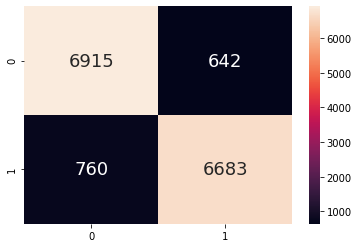

In [ ]:
#Plotting the two-way Confusion Matrix for the test dataset
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_Testdf, y_Preddf), annot = True, fmt=".0f", annot_kws={"size": 18})

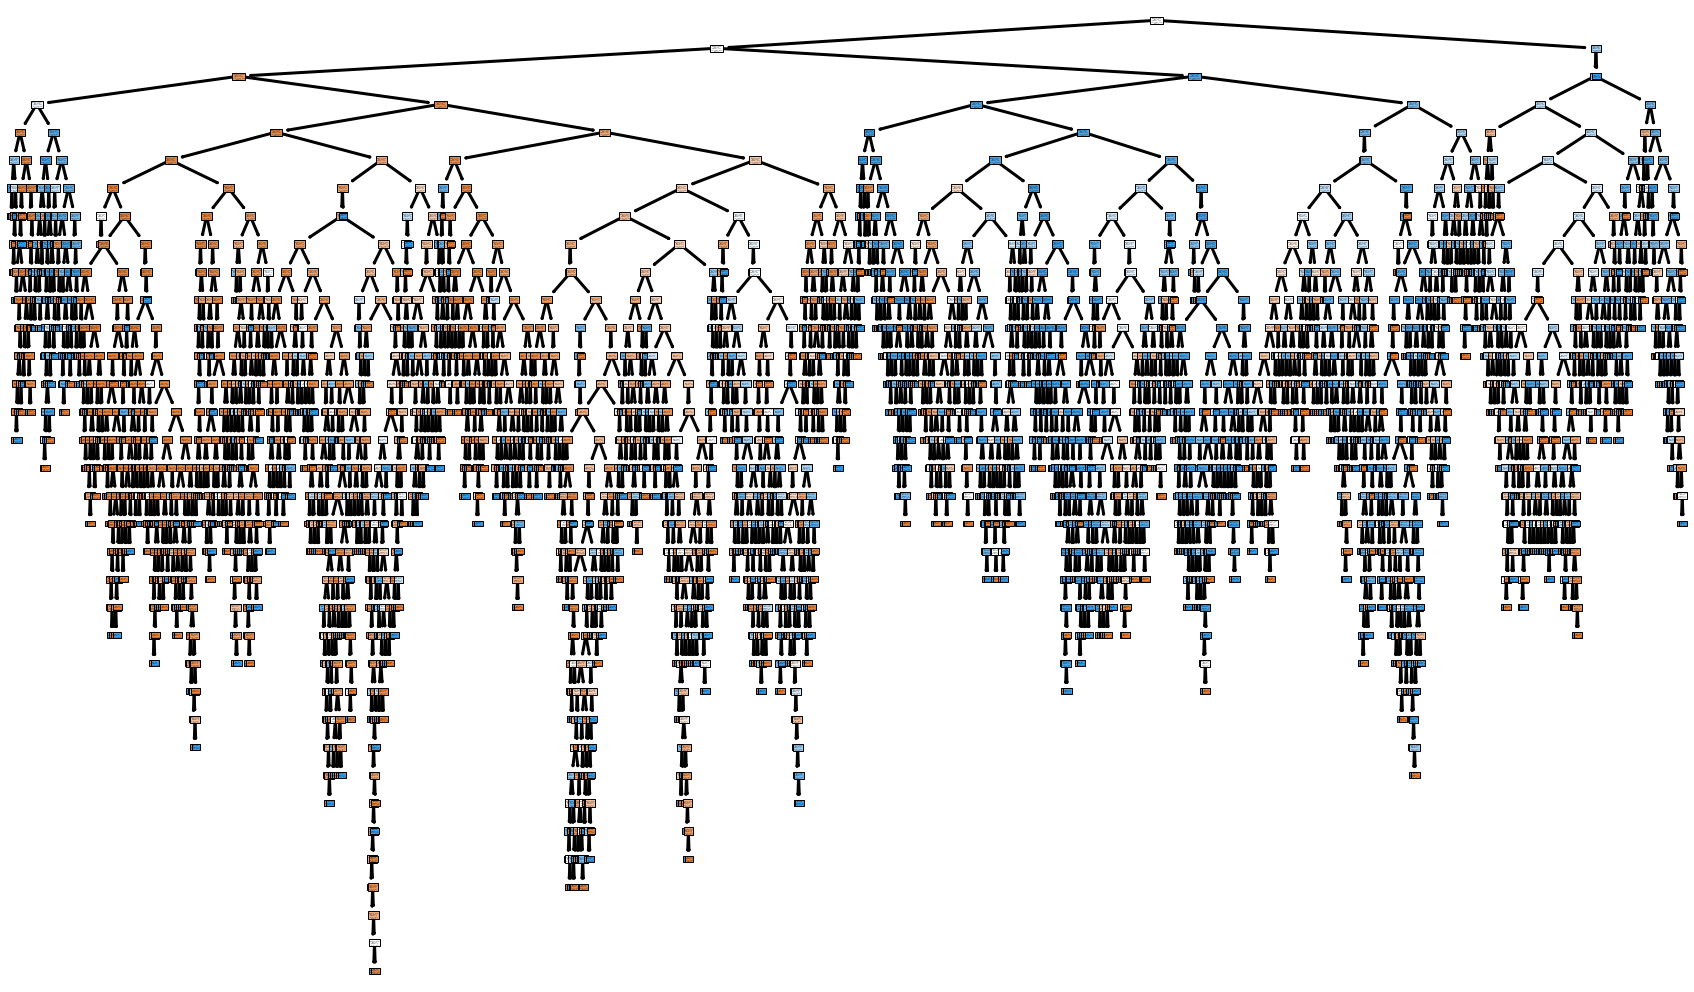

In [ ]:
#Importing the plot_tree() method from the module sklearn.tree to visualize a decision tree in the random forest model
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize = (30,18))
out = plot_tree(clf.estimators_[0], feature_names = X_Traindf.columns, 
                   class_names=[str(x) for x in clf.classes_],
                   filled = True);
#Marking the arrows between the nodes of the binary classification tree 
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show() #displaying the plot

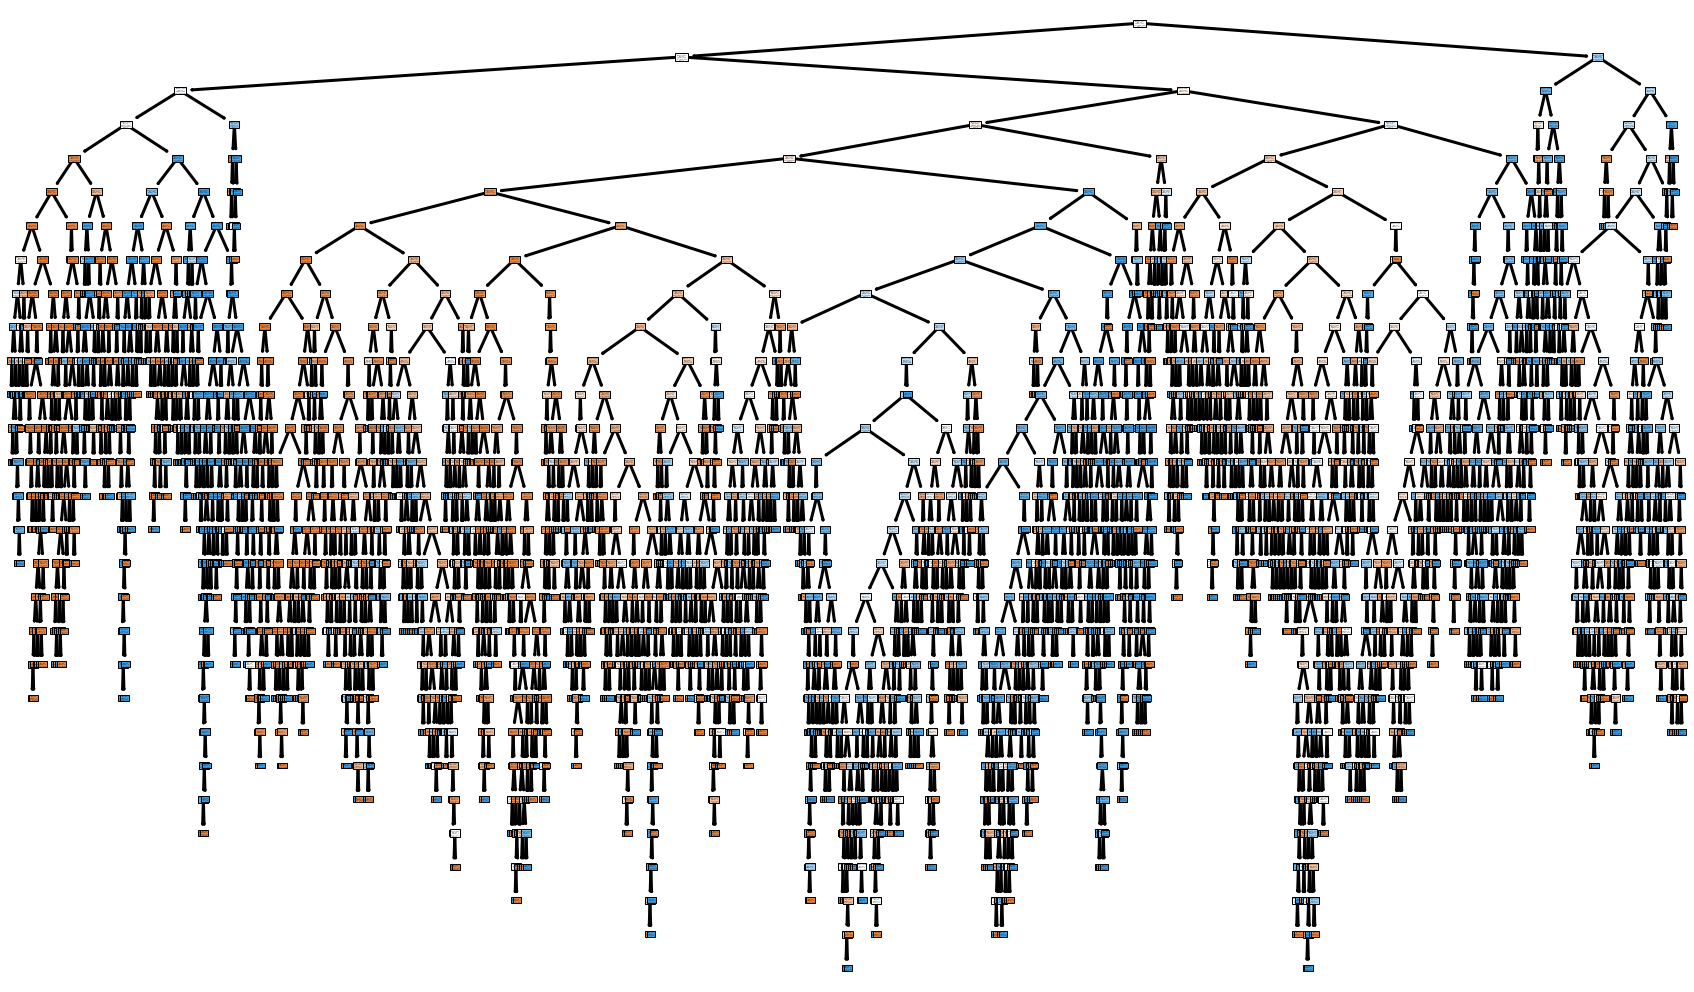

In [ ]:
#Importing the plot_tree() method from the module sklearn.tree to visualize a decision tree in the random forest model
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize = (30,18))
out = plot_tree(clf.estimators_[1], feature_names = X_Traindf.columns, 
                   class_names=[str(x) for x in clf.classes_],
                   filled = True);
#Marking the arrows between the nodes of the binary classification tree 
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show() #displaying the plot

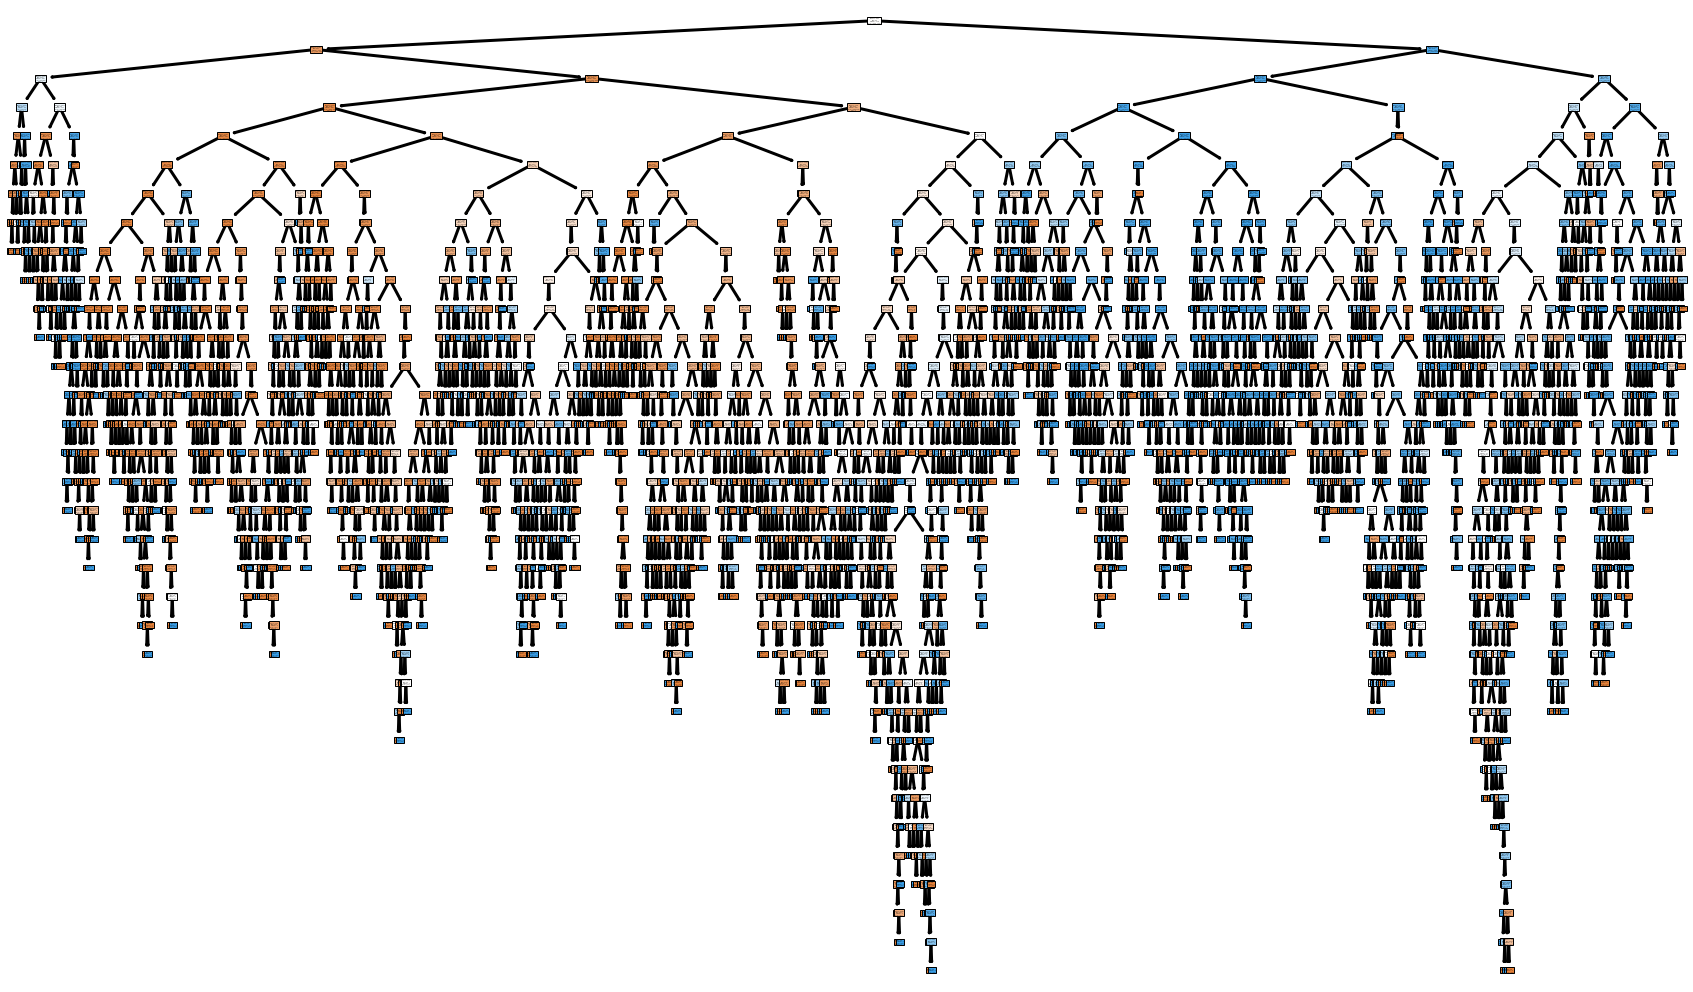

In [ ]:
#Importing the plot_tree() method from the module sklearn.tree to visualize a decision tree in the random forest model
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize = (30,18))
out = plot_tree(clf.estimators_[2], feature_names = X_Traindf.columns, 
                   class_names=[str(x) for x in clf.classes_],
                   filled = True);
#Marking the arrows between the nodes of the binary classification tree 
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show() #displaying the plot

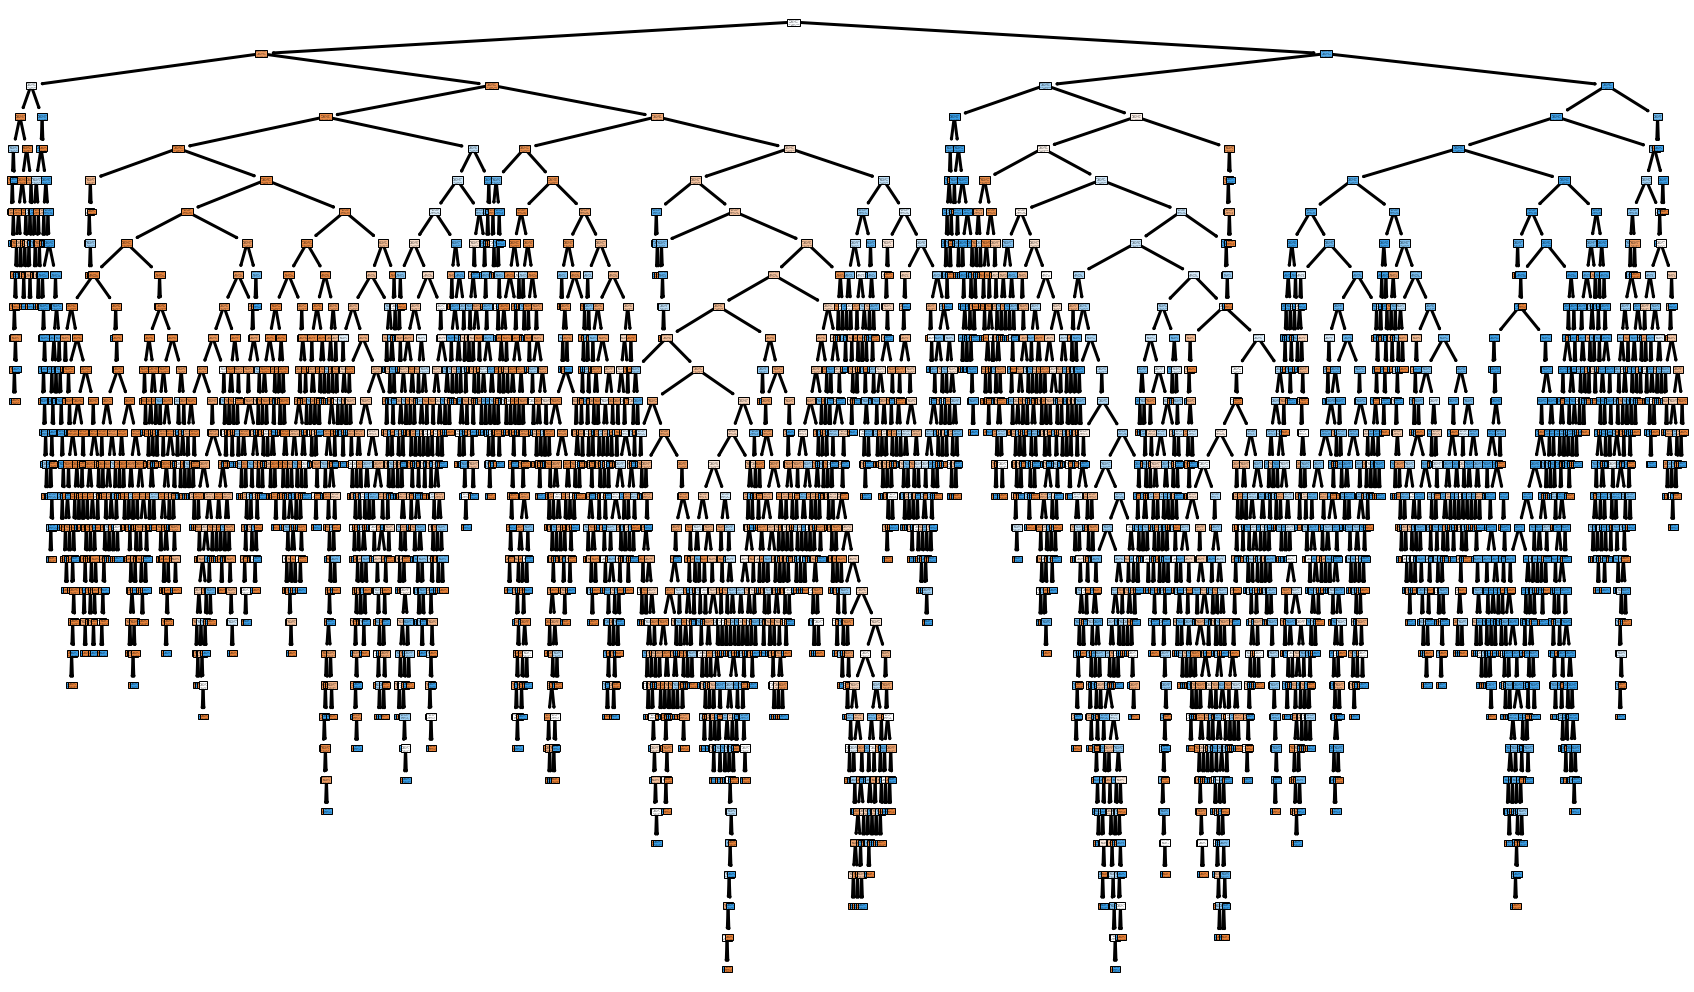

In [ ]:
#Importing the plot_tree() method from the module sklearn.tree to visualize a decision tree in the random forest model
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize = (30,18))
out = plot_tree(clf.estimators_[3], feature_names = X_Traindf.columns, 
                   class_names=[str(x) for x in clf.classes_],
                   filled = True);
#Marking the arrows between the nodes of the binary classification tree 
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show() #displaying the plot

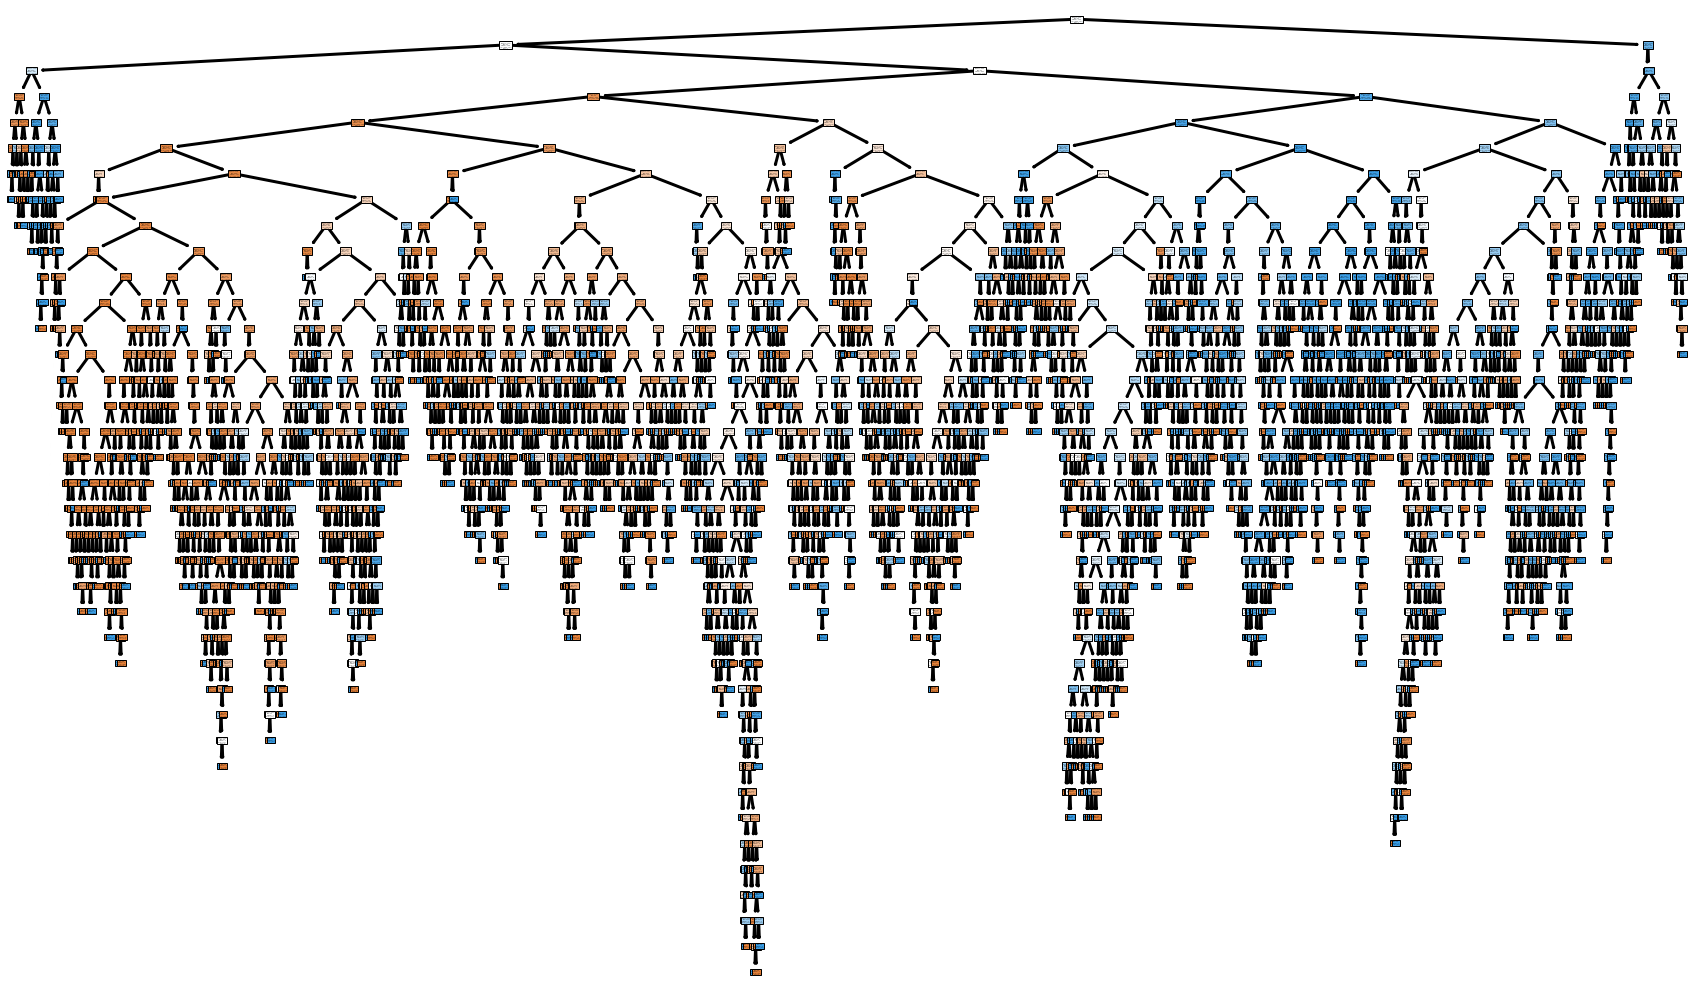

In [ ]:
#Importing the plot_tree() method from the module sklearn.tree to visualize a decision tree in the random forest model
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize = (30,18))
out = plot_tree(clf.estimators_[4], feature_names = X_Traindf.columns, 
                   class_names=[str(x) for x in clf.classes_],
                   filled = True);
#Marking the arrows between the nodes of the binary classification tree 
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show() #displaying the plot

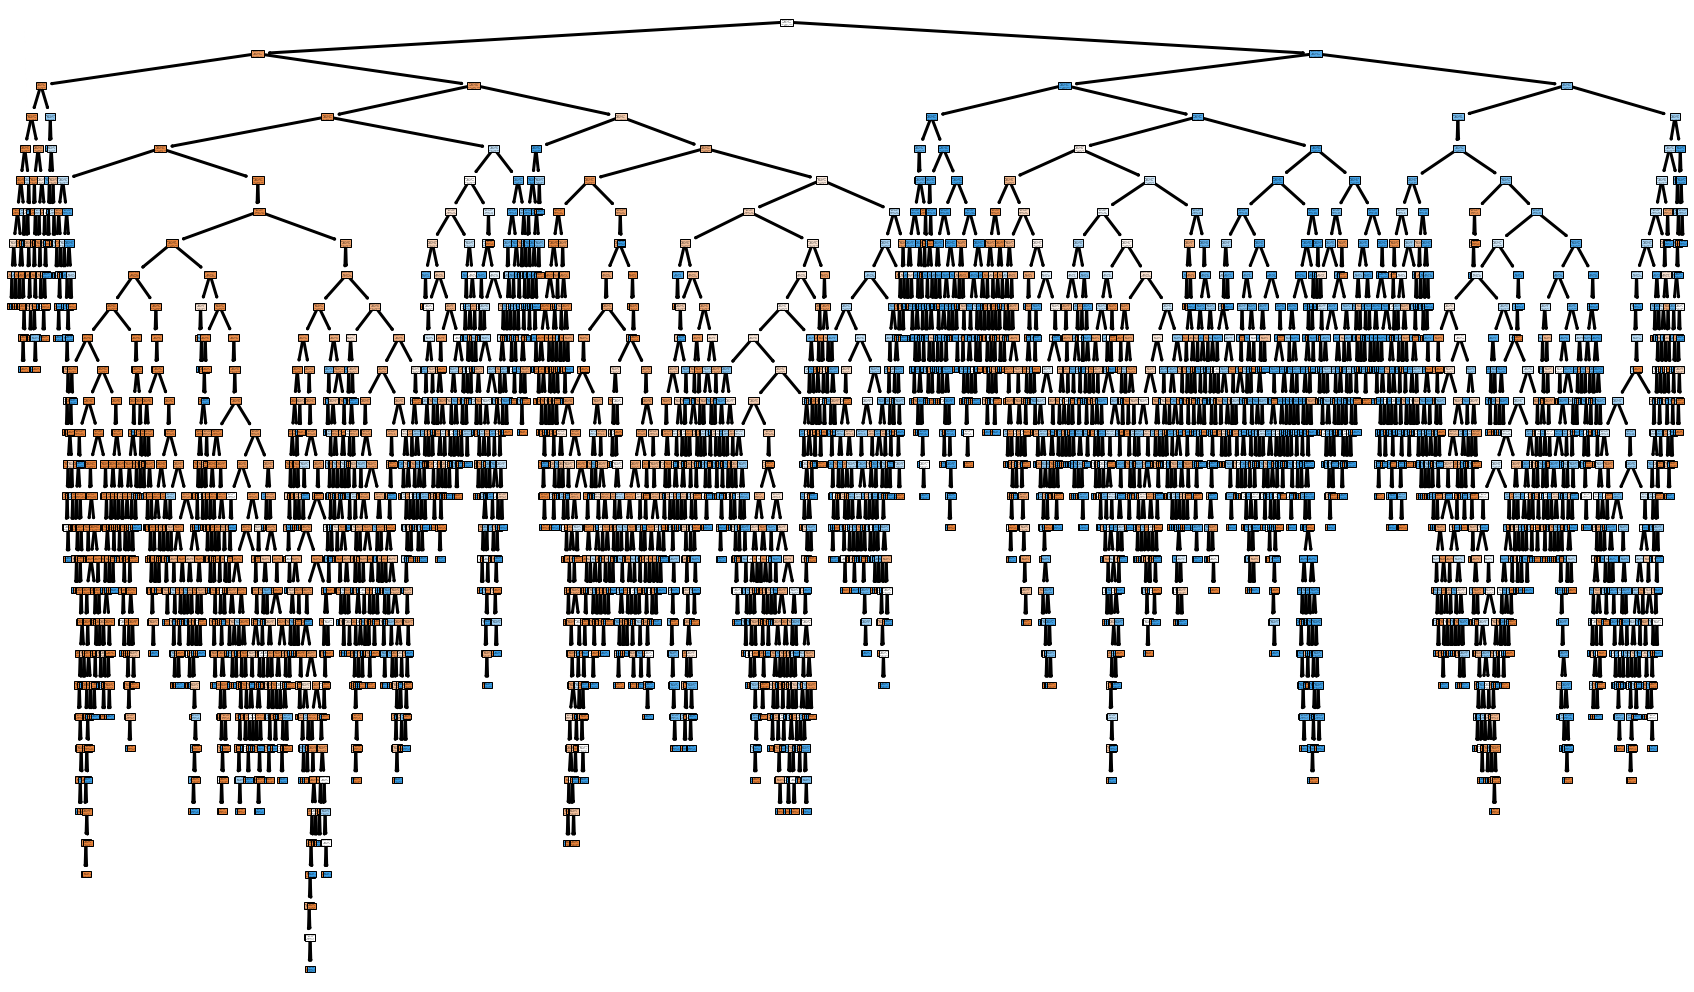

In [ ]:
#Importing the plot_tree() method from the module sklearn.tree to visualize a decision tree in the random forest model
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize = (30,18))
out = plot_tree(clf.estimators_[5], feature_names = X_Traindf.columns, 
                   class_names=[str(x) for x in clf.classes_],
                   filled = True);
#Marking the arrows between the nodes of the binary classification tree 
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show() #displaying the plot

Logistic Regression

Reference: https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

In [ ]:
from sklearn.linear_model import LogisticRegression #Importing the logistic regression model from sklearn
from sklearn import metrics #Importing the metrics module from sklearn

logreg = LogisticRegression() #creating an object 'logreg' to implement the Logistic Regression model
logreg.fit(X_Train, y_Train.ravel()) #fitting the model on the train dataset

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_PredA = logreg.predict(X_Test) #predicting the outcomes for the test dataset and storing them in y_PredA
y_PredAdf = pd.DataFrame(data=y_PredA) #converting the array y_PredA to a dataframe
y_PredAdf = y_PredAdf.rename(columns = {0:'Predicted Sentiments'}) #cleaning the dataset by renaming the column
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_Test, y_Test)))

Accuracy of logistic regression classifier on test set: 0.87


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_Test, y_PredA)
print(confusion_matrix) #printing the confusion matrix

[[6709  848]
 [1034 6409]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_Test, y_PredA)) #displaying the classification report

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      7557
           1       0.88      0.86      0.87      7443

    accuracy                           0.87     15000
   macro avg       0.87      0.87      0.87     15000
weighted avg       0.87      0.87      0.87     15000



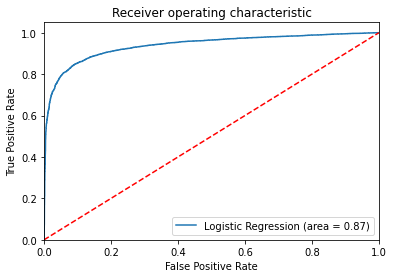

In [ ]:
#AUC - Area Under the Curve (Classification Accuracy)
#ROC - Receiver Operating Characteristics
#The curve determines how much a model is capable of distinguishing between classes.
from sklearn.metrics import roc_auc_score #Importing the function from sklearn.metrics
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_Test, logreg.predict(X_Test)) #fitting the function on y_Test and y_PredA
fpr, tpr, thresholds = roc_curve(y_Test, logreg.predict_proba(X_Test)[:,1]) #taking the datapoints with predicted class = 1
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() #displaying the ROC Curve

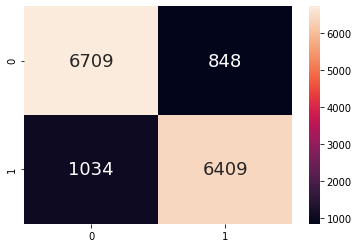

In [ ]:
#Plotting the two-way Confusion Matrix for the test dataset
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_Testdf, y_PredAdf), annot = True, fmt=".0f", annot_kws={"size": 18})

#ANALYSIS AND CONCLUSION

After analysing the data the chosen predictors were:
1. **length of the text sent.**
2. **the frequency of occurence of the 100 most commonly occuring 'good' words from the train dataset.**
3. **the frequency of occurence of the 100 most commonly occuring 'bad' words from the train dataset.**

Single variable decsion tree has been used to analyise how well the predictors can predict if the text is 'positive' or 'negative'. After analyising, **length** can be said to have the **worst accuracy** for prediction and using  **frequency of spam words** as a predictor can be said to have the **best accuracy** in precicting if the movie is a positive sentiment one or negative. However, the accuracy was still around the 50% range which shows that the model was 'guessing the sentiment', rather than performing supervised learning. 

Following this, we went to use a classification algorithm on multivariate decision tree and random forest.

**Multi variable decision tree** using frequency of spam (negative sentiment) words, frequency of good words (positive sentiment) and length as predictors gives an **accuracy of about 62.98%** on the test data in predicting if the text is 'positive' or 'negative' while **Random forest**, using frequency of spam words, frequency of good words and length as predictors, gives an **accuracy of 67%** on the test data in predicting if the text is 'positive' or 'negative'. So, between Decsion tree and Random Forest , random forest is better since it has greater classification accuracy. 


In order to get better features and improve the classification accuracy further, we went on to perform supervised learning using **Bag of Words** word embedding model. Testing it with Random forest and SVM algorithms, we received a classification accuracy of **84.3% and 87.15% respectively**.

However, 'Bag of Words' embedding takes only frequency into account for each review individually and not the 'importance' of each word, bigrams, and trigrams across the whole document. 

TF-IDF combats this, and testing our dataset using this model, on Random Forest and Logistic Regression, we received **90.65%** and **87%** classification accuracies on the test data respectively. 

Hence, in coclusion, we came to an agreement through our analysis of subjecting the dataset to various embedding models, that **TF-IDF model, using random forest classification gives us the best accuracy (90.65%) in predicting the sentiment of a film through the review.** 




